In [1]:
# importing the necessaary libraries when for classifcation of the Churn 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [2]:
# importing this wehn we are going to choose the Y as totalcharges

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,VotingRegressor,BaggingRegressor,StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [4]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',None)

In [5]:
df.head()
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              29.85        29.85    No  
1              56.95       1889.5    No  
2              53.85       108.15   Yes  
3              42.30      1840.75    No  
4              70.70       151.65   Yes  
...              ...          ...   ...  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No  

[7043 rows x 21 columns]

In [6]:
# here we can get some basic idea that what columns are in categorical or not and what columns are need to be convereed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# We use to check this plot cause we want to check how is the data is distributed in the dataset and also i want to check the min and mmax value so that i can get a basic idea of the distribution of the data 
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# first now i will try to check the ditribution for every plot but before that i am going to drop the customerId
df.drop(['customerID'],axis=1,inplace=True)

In [10]:
# this is we are going to first seprate the columns of the data and check theere distrubtion for this 
cat_cols=[]

for col in df.columns: 
     if df[col].dtype == 'object':
        cat_cols.append(col)

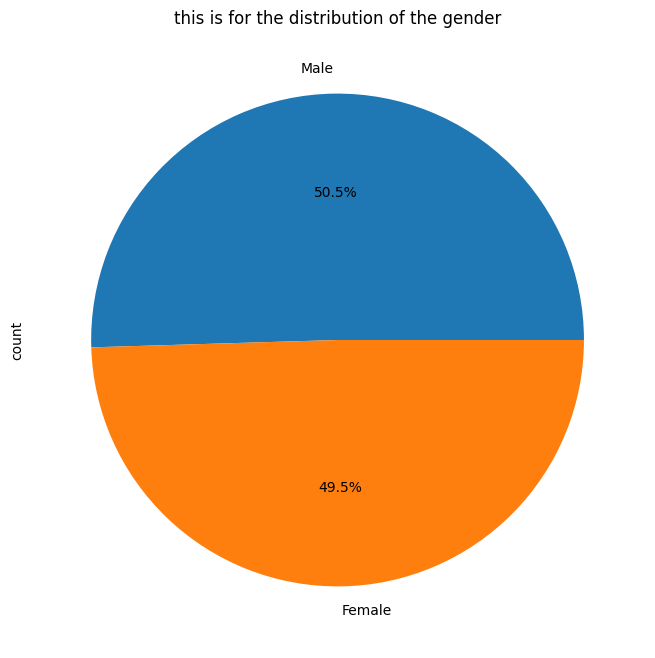

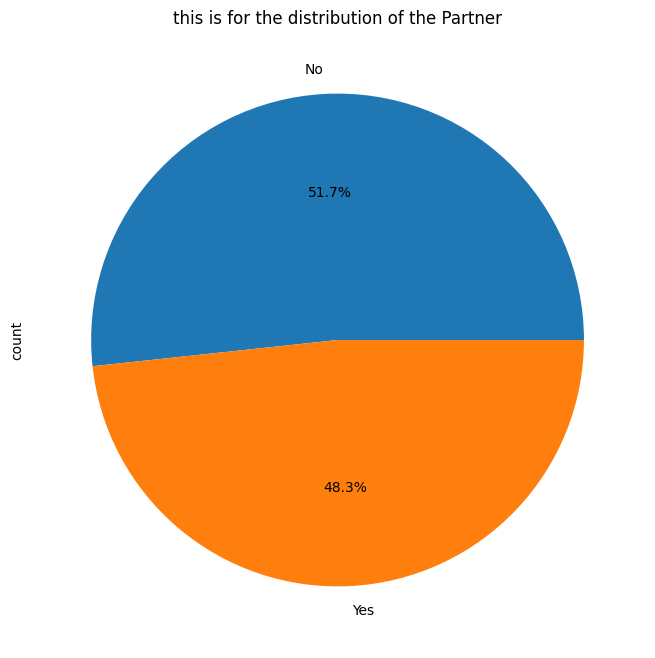

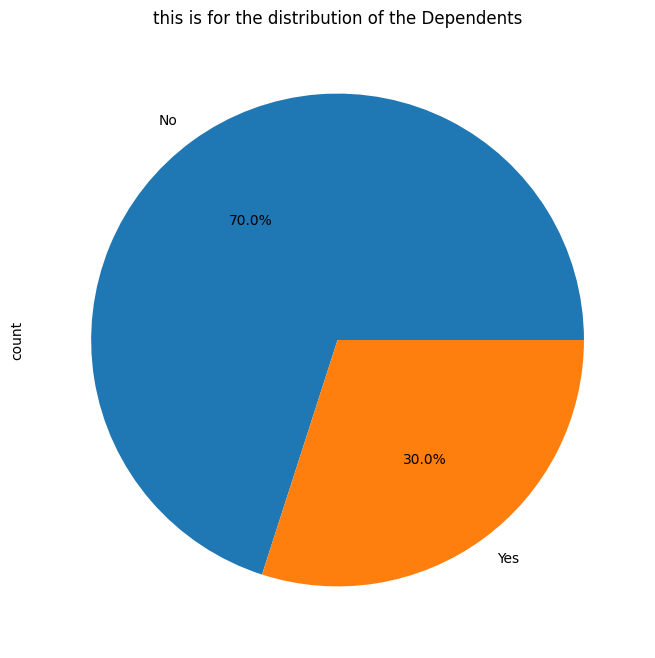

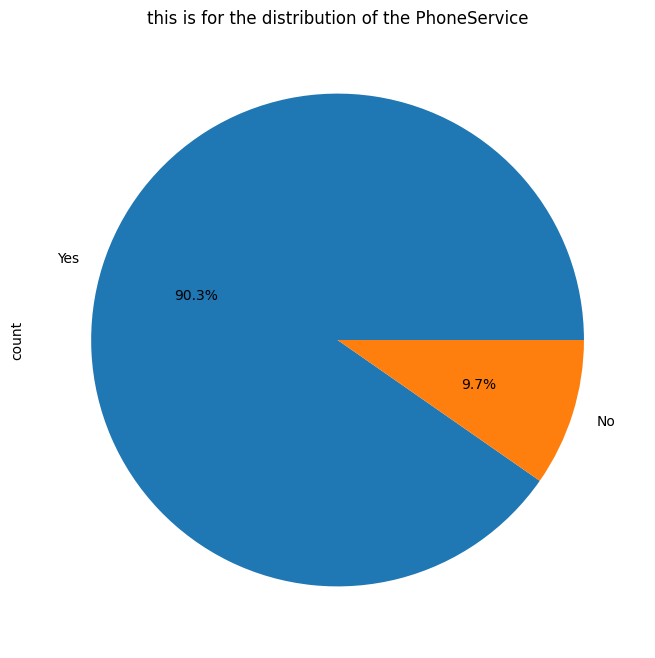

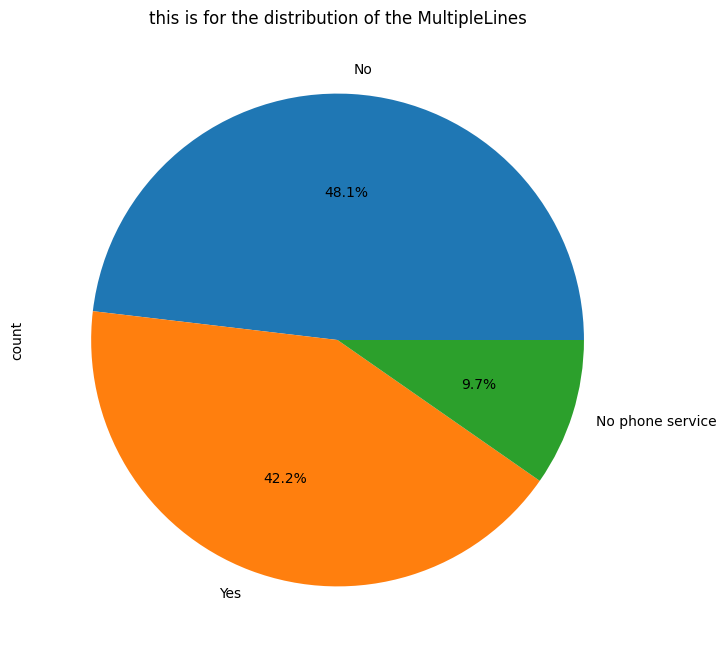

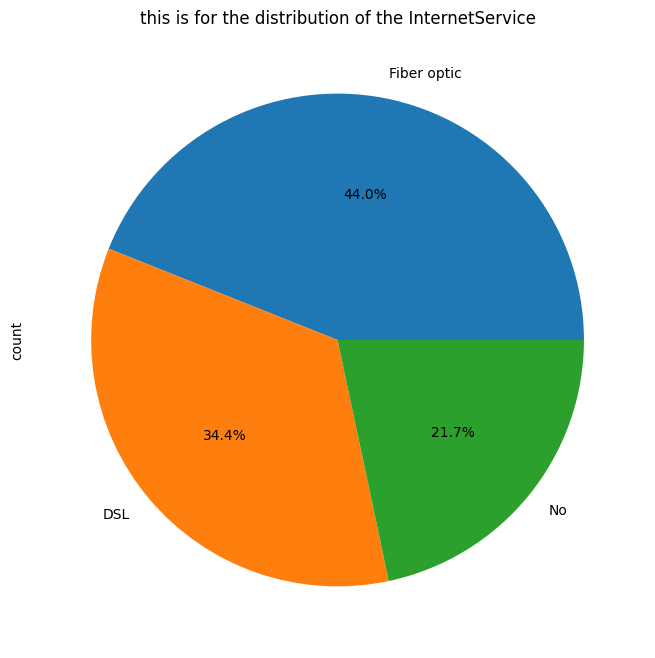

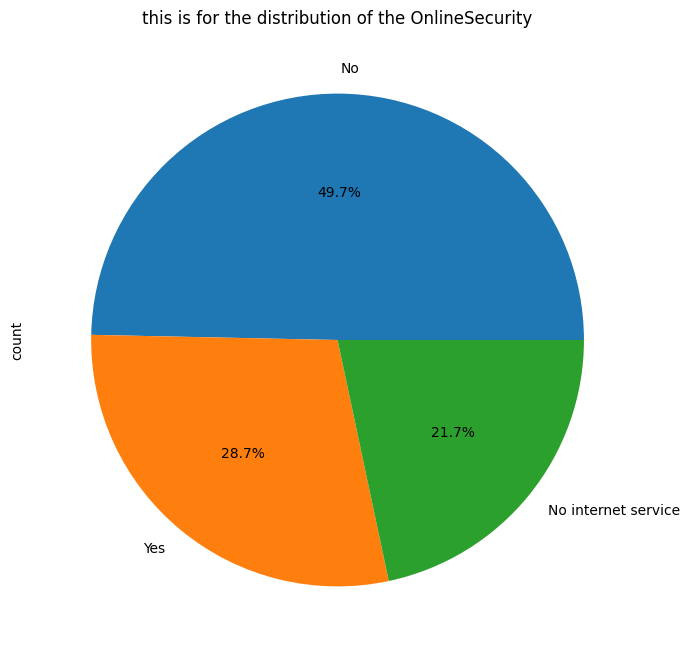

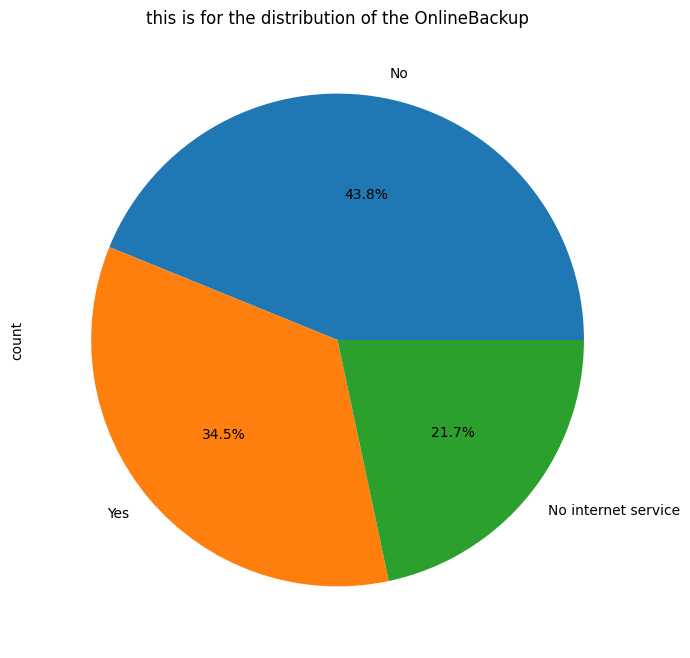

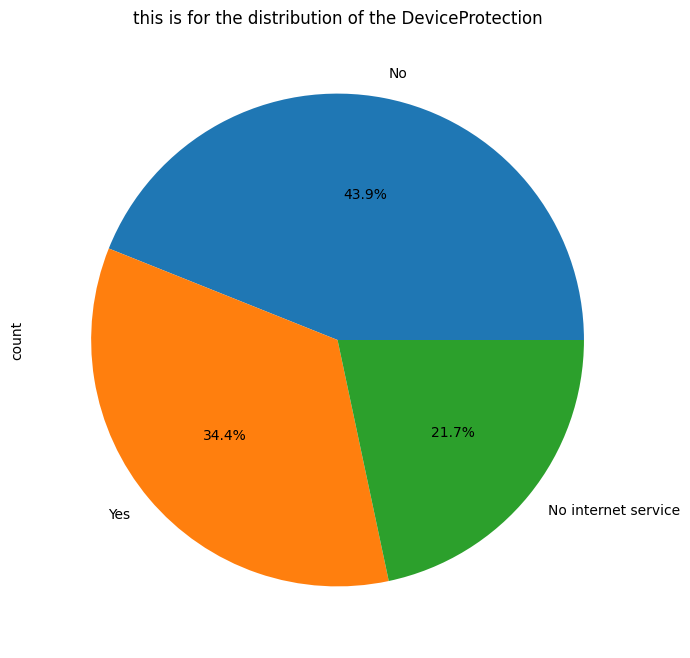

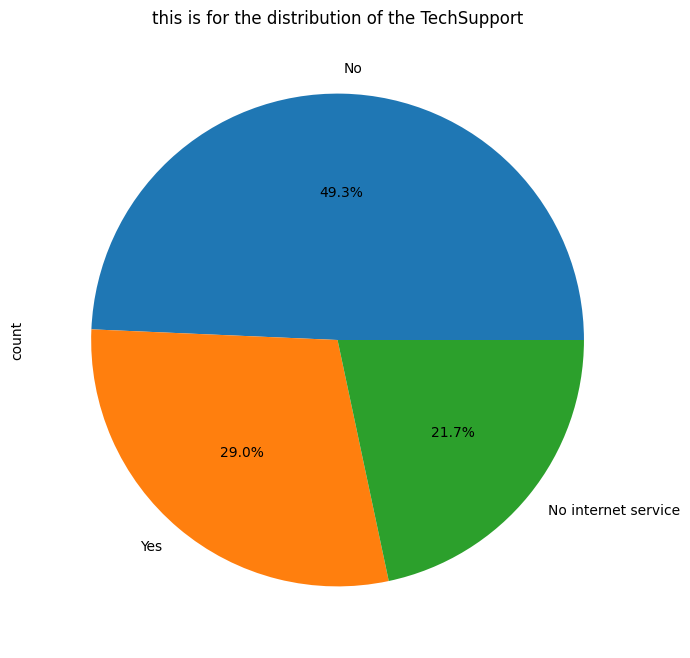

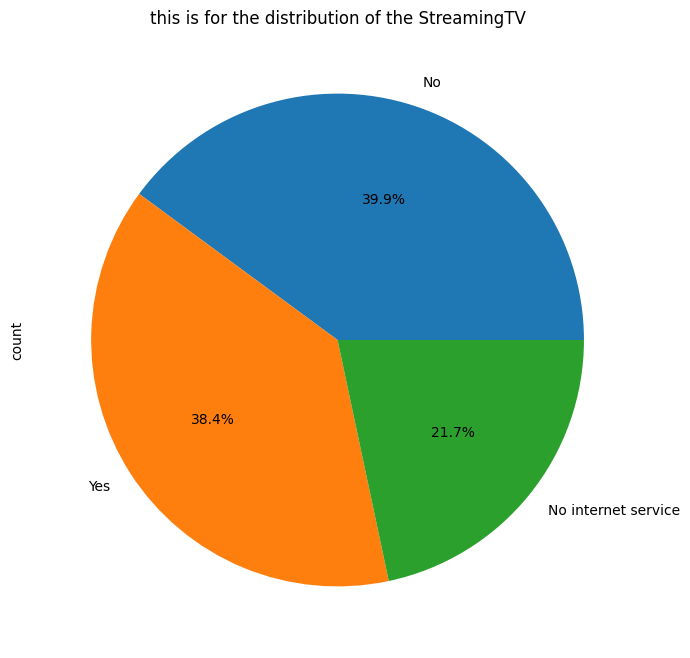

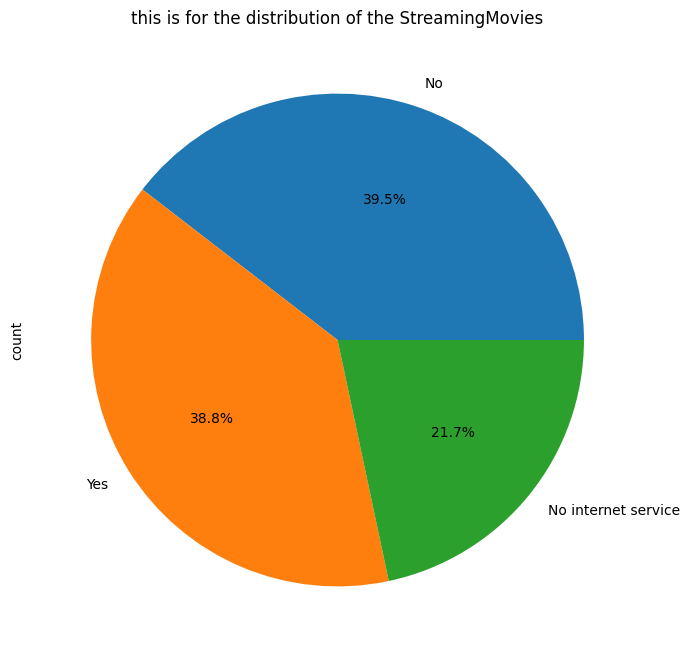

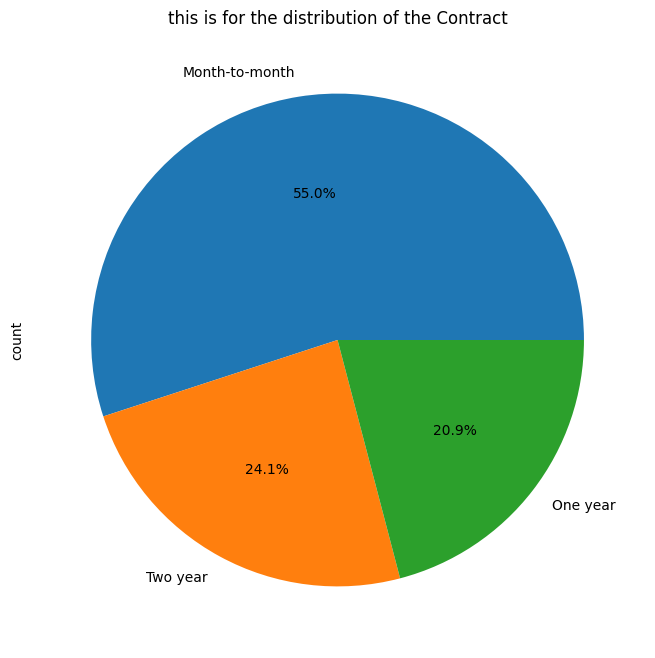

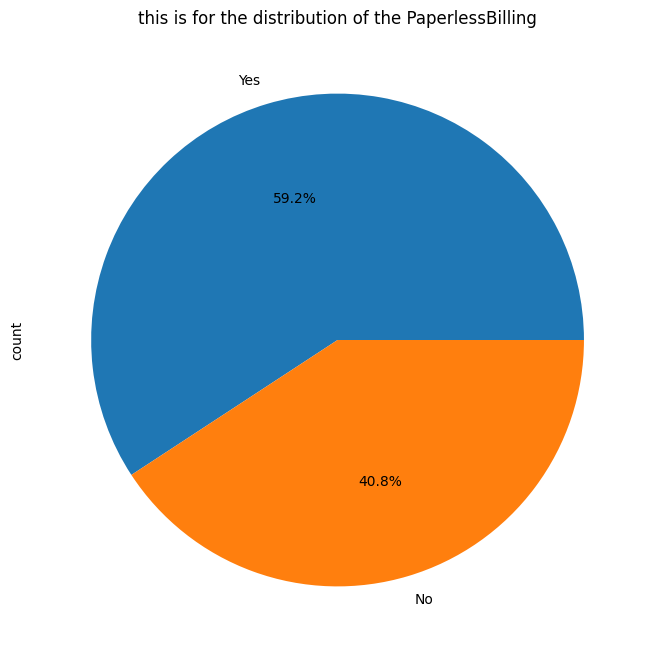

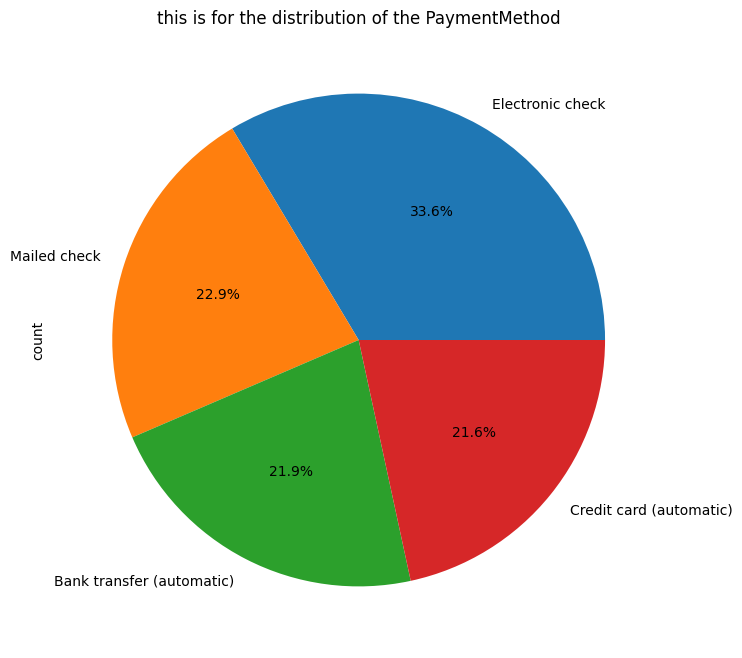

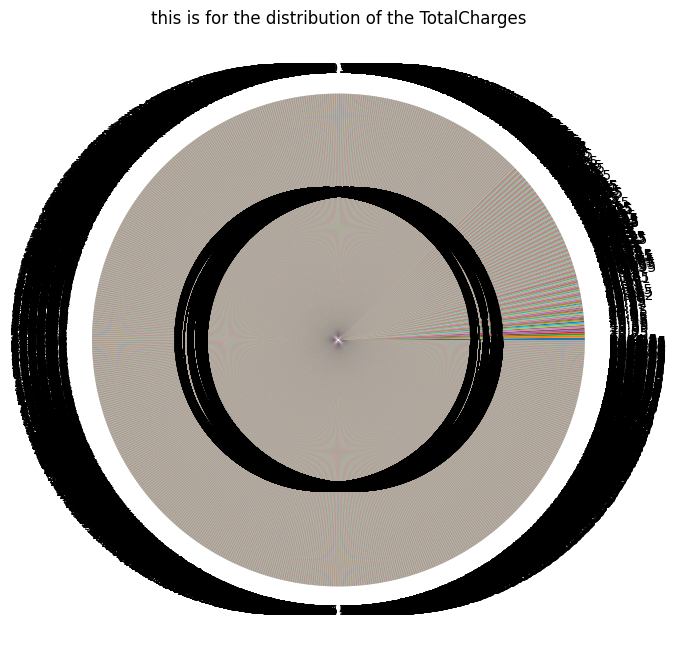

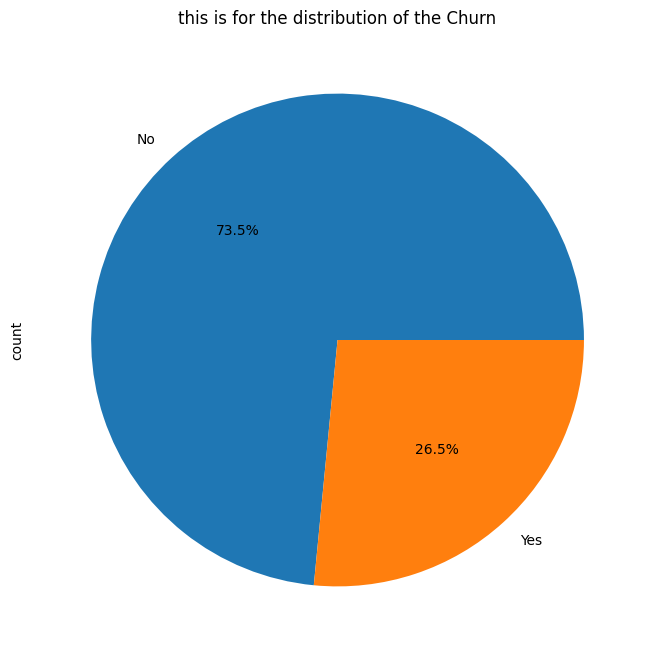

In [11]:
# So  here we are plotting the distribution for everyplot in pie plot so that we can  get the basic idea of there distribtion and also get whether they are not being distribted in bias ways
for col in cat_cols: 
    plt.figure(figsize=(12,8))
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f"this is for the distribution of the {col}")
    plt.show()


In [12]:
num_cols = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # check exact dtypes
        num_cols.append(col)


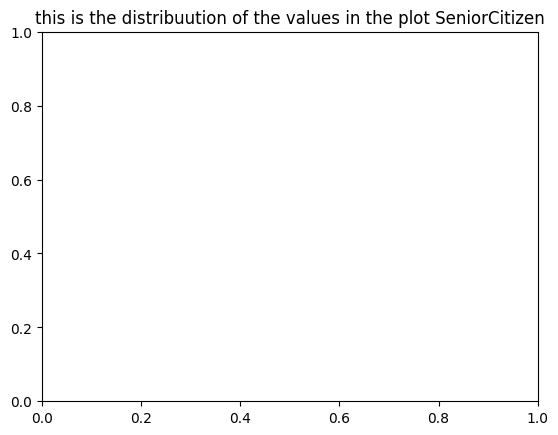

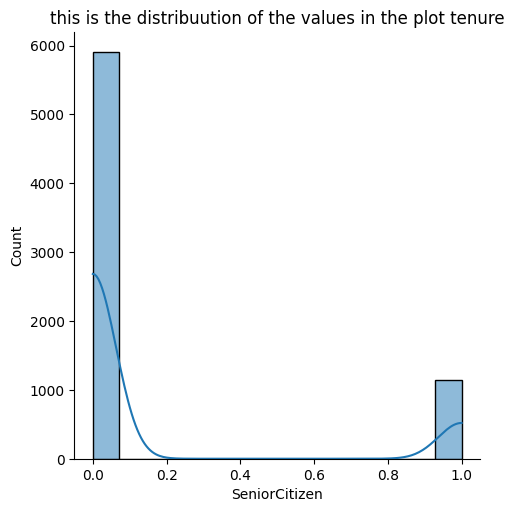

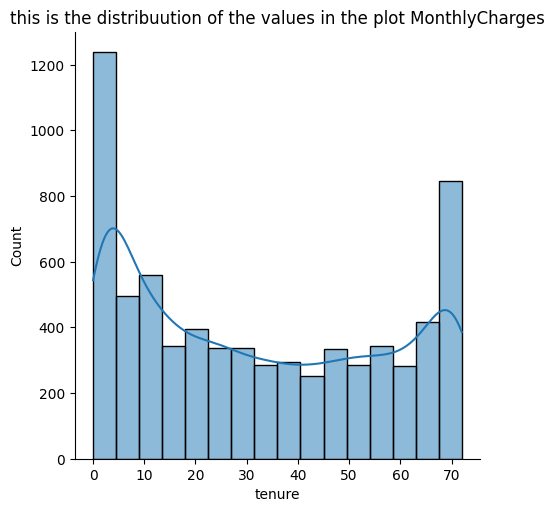

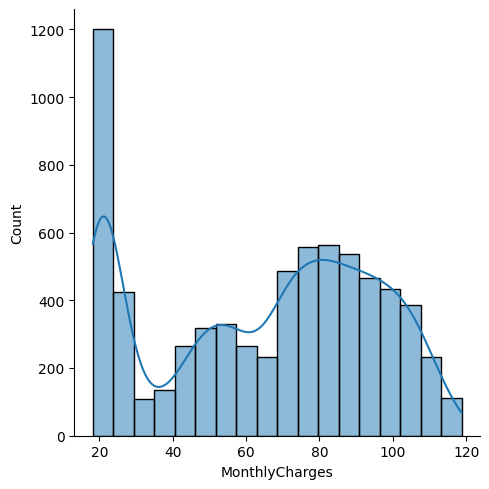

In [13]:
for col in num_cols: 
    plt.title(f"this is the distribuution of the values in the plot {col}")
    sns.displot(data=df[col],kde=True)  

In [14]:
df['SeniorCitizen'].value_counts()
# So here we can pretty much see that there is pretty much diffrence in the age group and data is bit biased towards the non senior citizen 


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

<Axes: xlabel='SeniorCitizen', ylabel='TotalCharges'>

C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


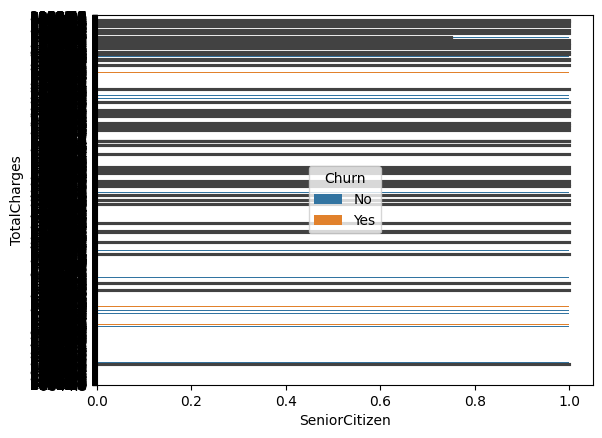

In [15]:
# SO here in this plot i wanted to check whether the person who is old or not how do they spend there total money and based upon a spefici range whether they churn it or not 
sns.barplot(data=df,x=df['SeniorCitizen'],y=df['TotalCharges'],hue=df['Churn'])

<Axes: xlabel='SeniorCitizen', ylabel='TotalCharges'>

C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


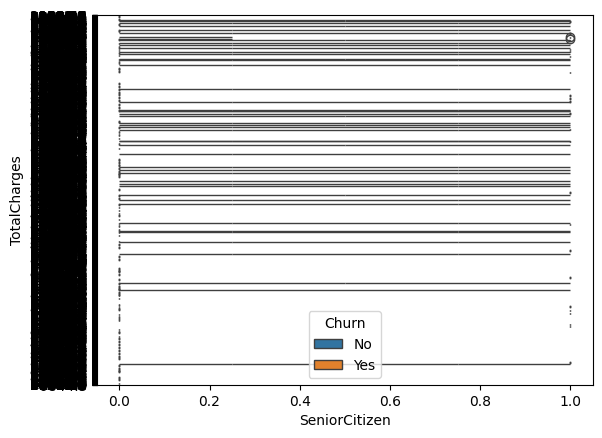

In [16]:
sns.boxplot(x='SeniorCitizen', y='TotalCharges', hue='Churn', data=df)


In [17]:
def multi_plot(df, plots):

    for p in plots:
        plt.figure(figsize=(12,7))
        p_type = p.get('type', 'count')
        
        if p_type == 'count':
            sns.countplot(x=p['x'], hue=p.get('hue', None), data=df)
            plt.title(f"Countplot of {p['x']}")
        
        elif p_type == 'bar':
            data = df.groupby(p['x'])[p['y']].mean().reset_index()
            sns.barplot(x=p['x'], y=p['y'], data=data)
            plt.title(f"Barplot of {p['y']} by {p['x']}")
        
        elif p_type == 'box':
            sns.boxplot(x=p['x'], y=p['y'], data=df)
            plt.title(f"Boxplot of {p['y']} by {p['x']}")
        
        elif p_type == 'violin':
            sns.violinplot(x=p['x'], y=p['y'], data=df)
            plt.title(f"Violinplot of {p['y']} by {p['x']}")
        
        elif p_type == 'scatter':
            sns.scatterplot(x=p['x'], y=p['y'], hue=p.get('hue', None), data=df)
            plt.title(f"Scatterplot of {p['y']} vs {p['x']}")
        
        elif p_type == 'line':
            sns.lineplot(x=p['x'], y=p['y'], data=df)
            plt.title(f"Lineplot of {p['y']} vs {p['x']}")
        
        elif p_type == 'hist':
            sns.histplot(df[p['x']], bins=p.get('bins', 10), kde=p.get('kde', False))
            plt.title(f"Histogram of {p['x']}")
        
        elif p_type == 'pie':
            df[p['x']].value_counts().plot.pie(autopct='%1.1f%%')
            plt.title(f"Pie chart of {p['x']}")
        
        elif p_type == 'heatmap':
            corr = df[p.get('columns', df.select_dtypes('number').columns)].corr()
            sns.heatmap(corr, annot=True, cmap='coolwarm')
            plt.title("Correlation Heatmap")
        
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

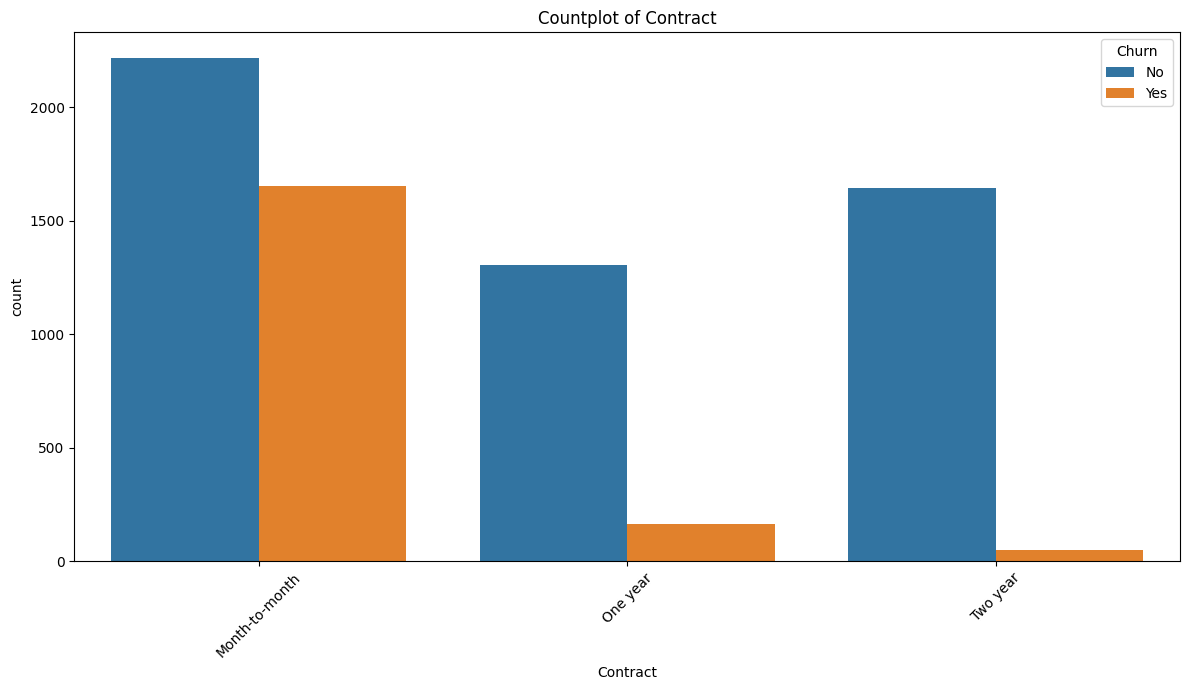

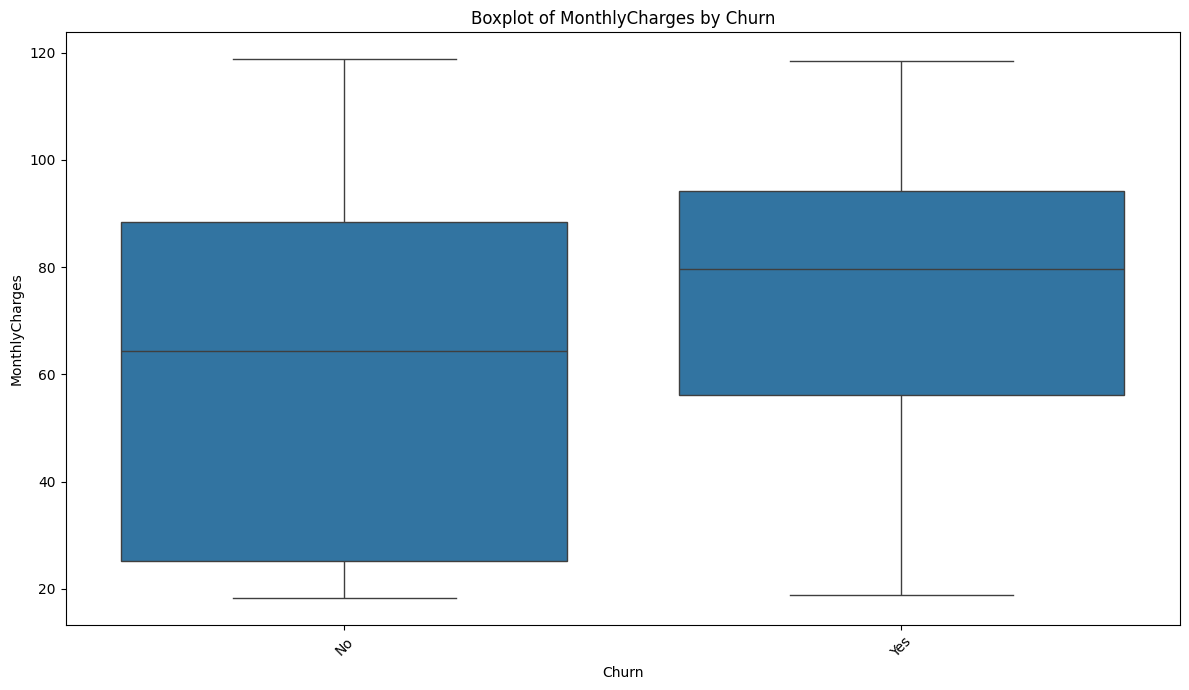

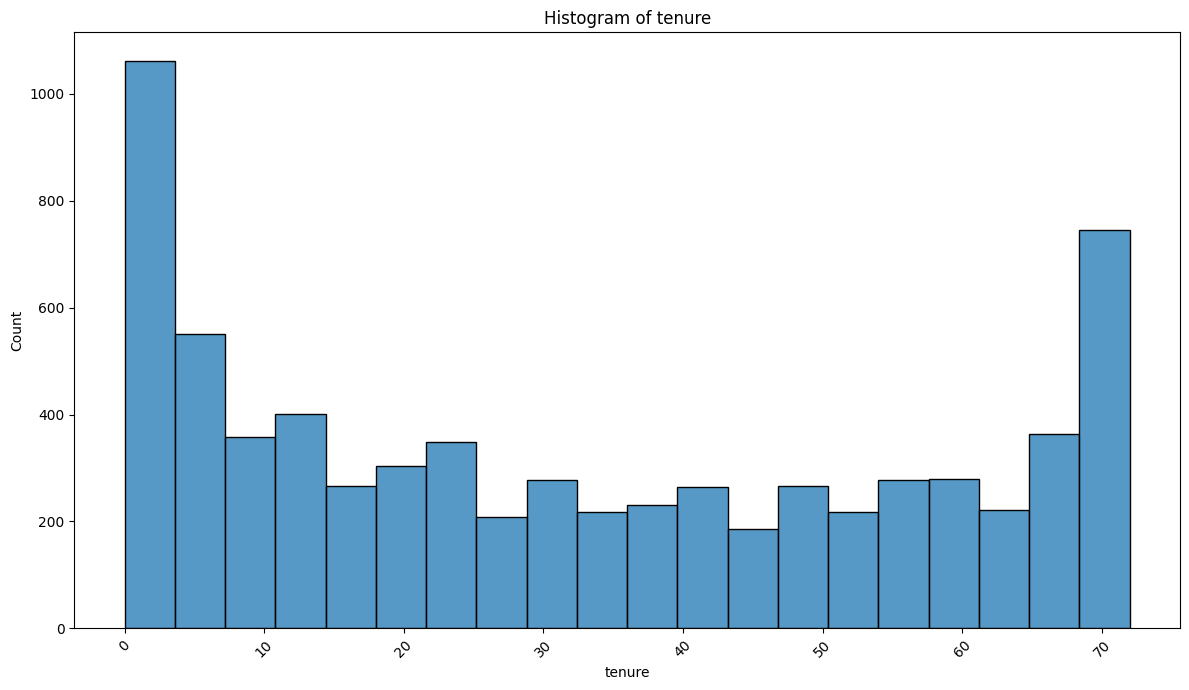

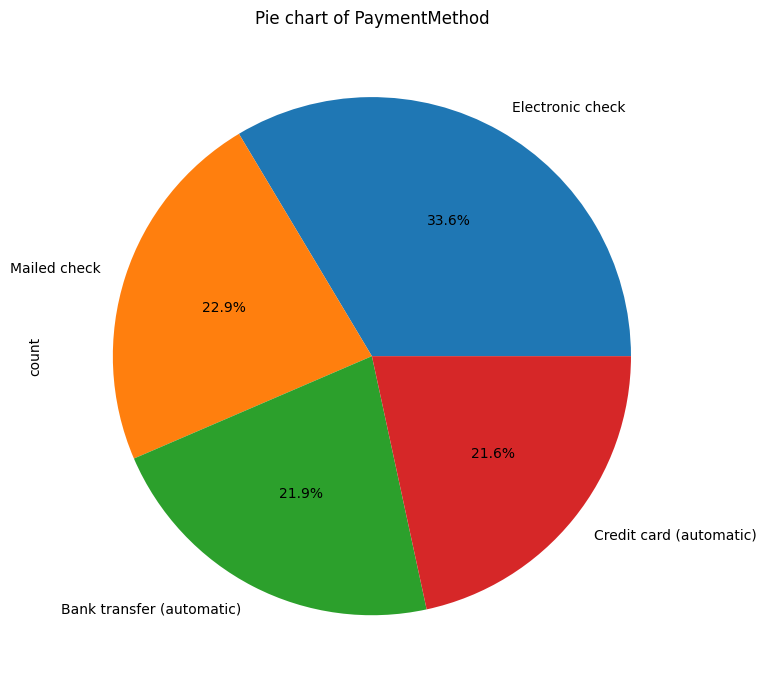

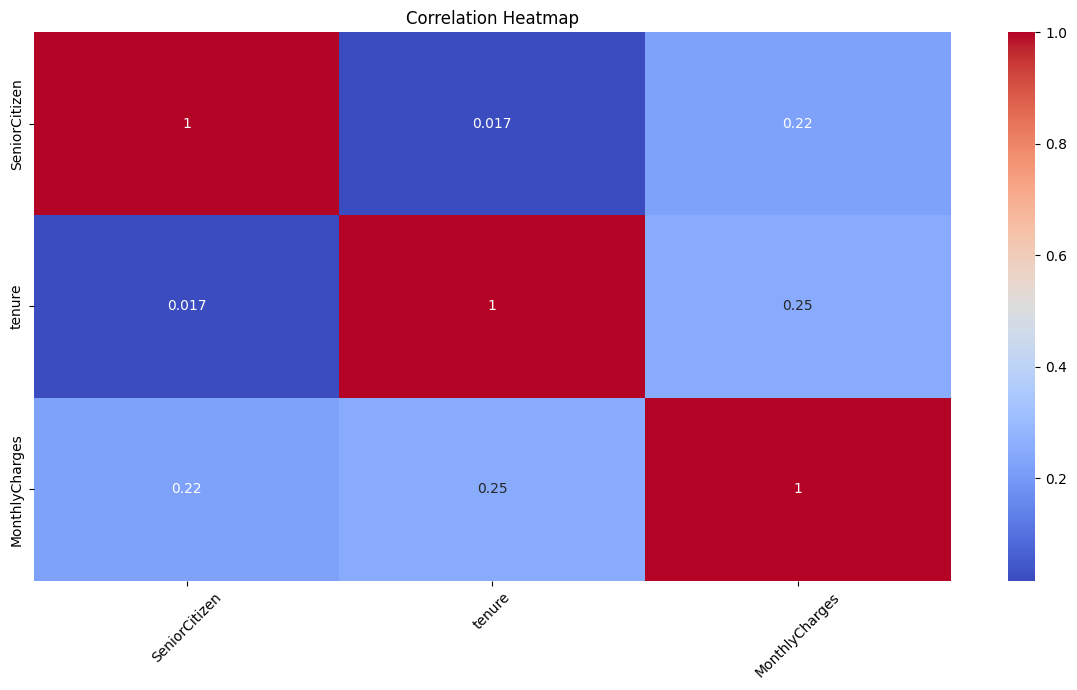

In [18]:
plots = [
    {'type':'count', 'x':'Contract', 'hue':'Churn'},
    {'type':'box', 'x':'Churn', 'y':'MonthlyCharges'},
    {'type':'hist', 'x':'tenure', 'bins':20},
    {'type':'pie', 'x':'PaymentMethod'},
    {'type':'heatmap'}
]

multi_plot(df, plots)
# so here from this plot what we can gain insight is that mostly people always say dont churn the that means that user service from that company is pretty much poor and we can see that clearly here
# first even in month to month which for the avg company should be parallel or atleat equal there is clear diffrence and in the dfifrecne of one year and two year its clear difference we can see that so that means the customer service from this company might be poor and all 
#Customers with higher monthly charges are more likely to churn.
#Customers paying lower charges (30–50 range) are less likely to churn.
#The spread for non-churn customers is wider (they exist in both low and mid charges), while churn customers are more concentrated at higher charges.
# Second insighgt we can get here from that mostly peopel use the electronic check for there payment and all 

<Axes: xlabel='tenure', ylabel='Count'>

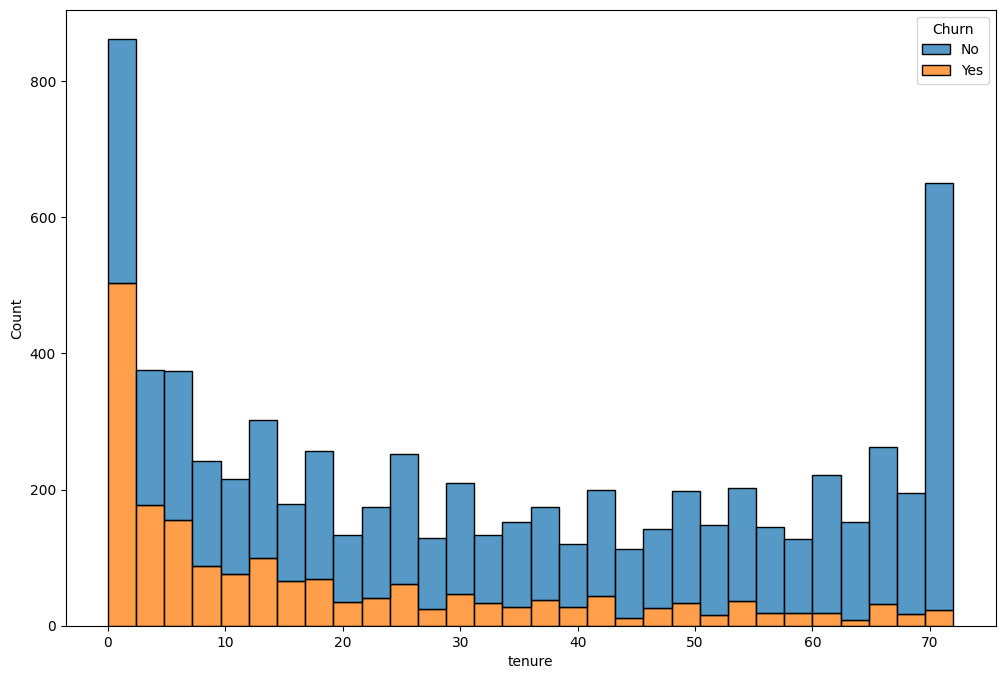

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(12,8))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=False, multiple="stack")
# so from this we can a get a insght that if tenure is less than 10 or somewhere around that people will most likely churn and this proves that mostly the service is poor thats why popel dont choose that

<Axes: xlabel='tenure_group', ylabel='TotalCharges'>

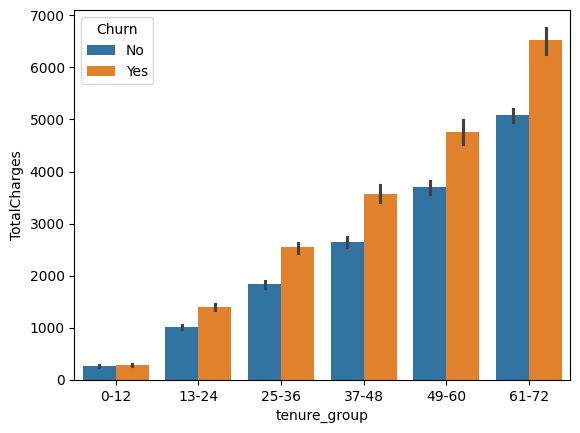

In [20]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,36,48,60,72], labels=["0-12","13-24","25-36","37-48","49-60","61-72"])
sns.barplot(data=df, x='tenure_group', y='TotalCharges', hue='Churn')


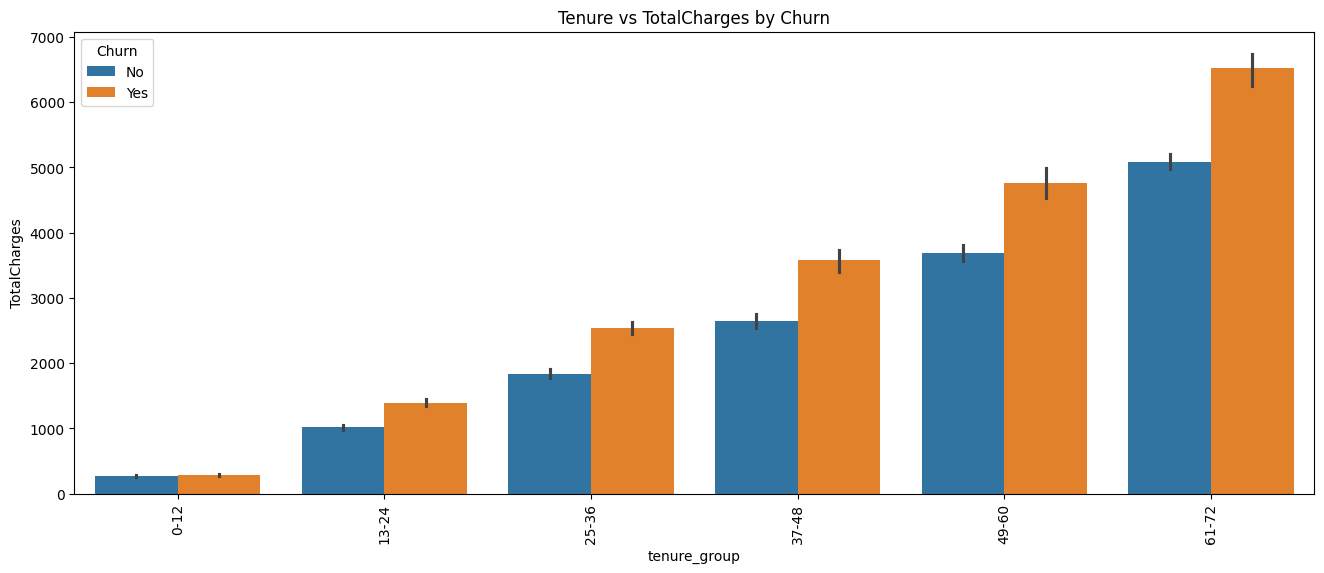

In [21]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

plt.figure(figsize=(16,6))
sns.barplot(data=df, x='tenure_group', y='TotalCharges', hue='Churn', alpha=1)
plt.title("Tenure vs TotalCharges by Churn")
plt.xticks(rotation=90)
plt.show()

# i had the doubt while plotting this cause most of my earlier hypothesis were proving that they have bad tenure and in this plot they are getting better churn so i felt somethig was off

C:\Users\91800\AppData\Local\Temp\ipykernel_22072\3917669472.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby("tenure_group")["Churn"].value_counts(normalize=True).mul(100).rename("percent").reset_index()


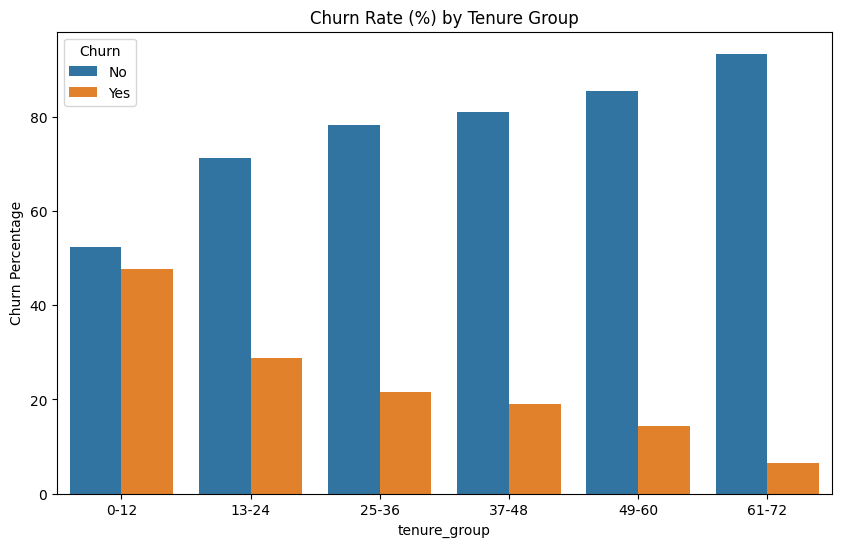

In [22]:
churn_rate = df.groupby("tenure_group")["Churn"].value_counts(normalize=True).mul(100).rename("percent").reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=churn_rate, x="tenure_group", y="percent", hue="Churn")
plt.title("Churn Rate (%) by Tenure Group")
plt.ylabel("Churn Percentage")
plt.show()



<Axes: xlabel='PhoneService', ylabel='TotalCharges'>

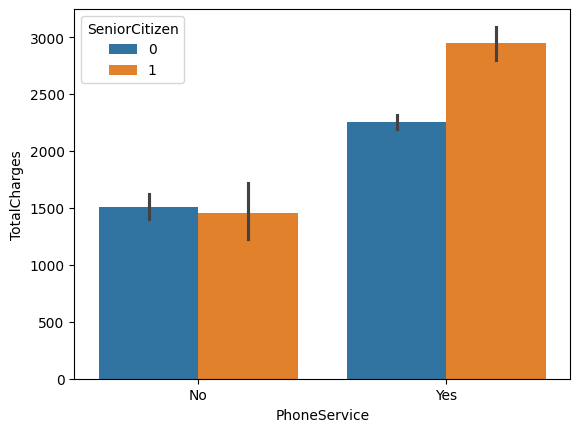

In [23]:
# so here what we can get insihgt is that those who are taking phone service are mostly seniors which means that they must be having higer bill 
# we can also see here taht  most of them are senior cizien only in that 
sns.barplot(data=df,x=df['PhoneService'],y=df['TotalCharges'],hue=df['SeniorCitizen'])

<Axes: xlabel='gender', ylabel='TotalCharges'>

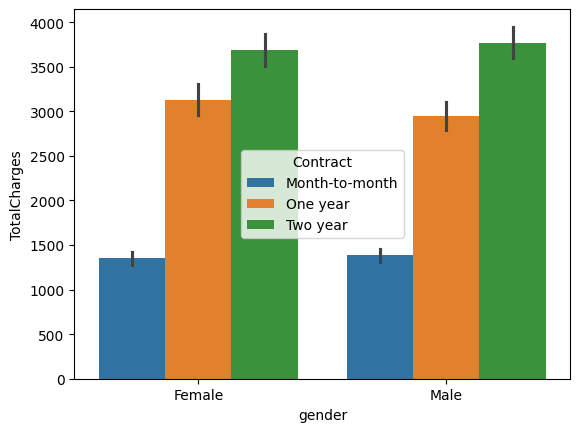

In [24]:
# Average total charges are naturally higher for one-year and two-year contracts than for month-to-month
sns.barplot(data=df,x=df['gender'],y=df['TotalCharges'],hue=df['Contract'])

<Axes: xlabel='gender', ylabel='count'>

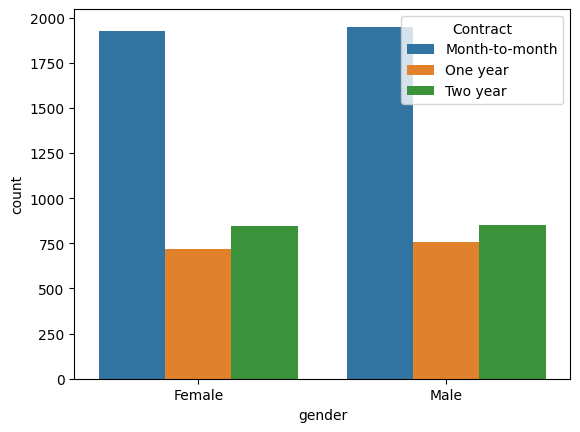

In [25]:
# so this part confirms that most of the people chooze the month-month subcitopn in both categories 

sns.countplot(data=df,x=df['gender'],hue=df['Contract'])


<Axes: xlabel='InternetService', ylabel='TotalCharges'>

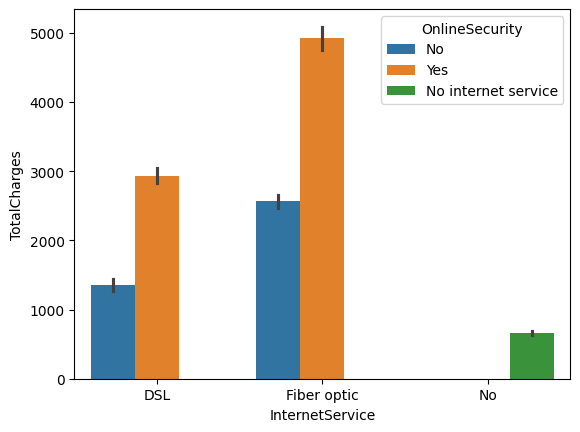

In [26]:
# so here we can get the insight that mostly the fiber opitic is more expensive then DSL which is the first thing and second thing we can get here that fiberoptic is more epensive than DSL which proves that why it is providing the better securiry 
sns.barplot(data=df,x=df['InternetService'],y=df['TotalCharges'],hue=df['OnlineSecurity'])

<Axes: xlabel='InternetService', ylabel='TotalCharges'>

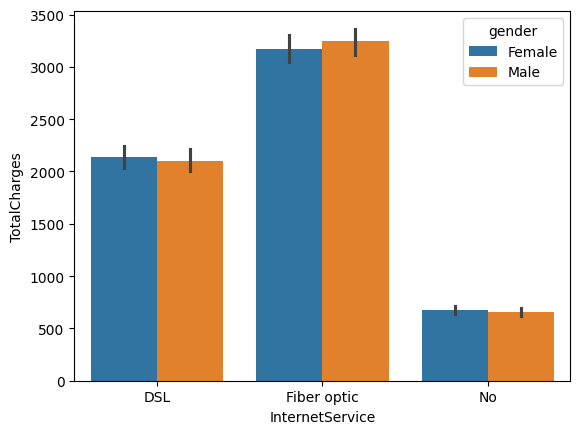

In [27]:
# so here we can see that major buyer of teh DSL is female and fiber optic is male which we can get insight that male work demand more security from here 
sns.barplot(data=df,x=df['InternetService'],y=df['TotalCharges'],hue=df['gender'])

<Axes: >

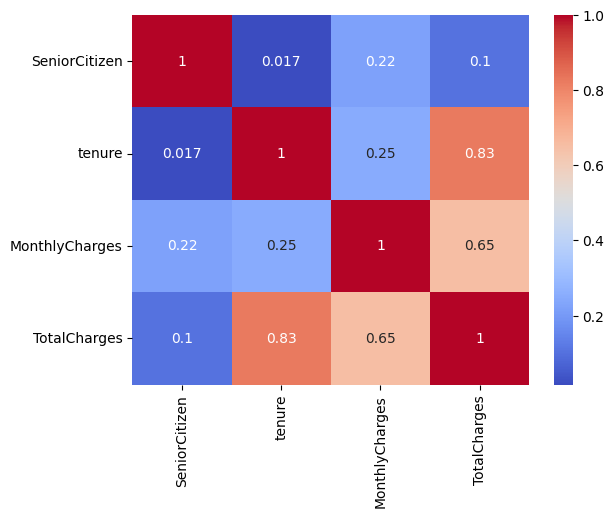

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")


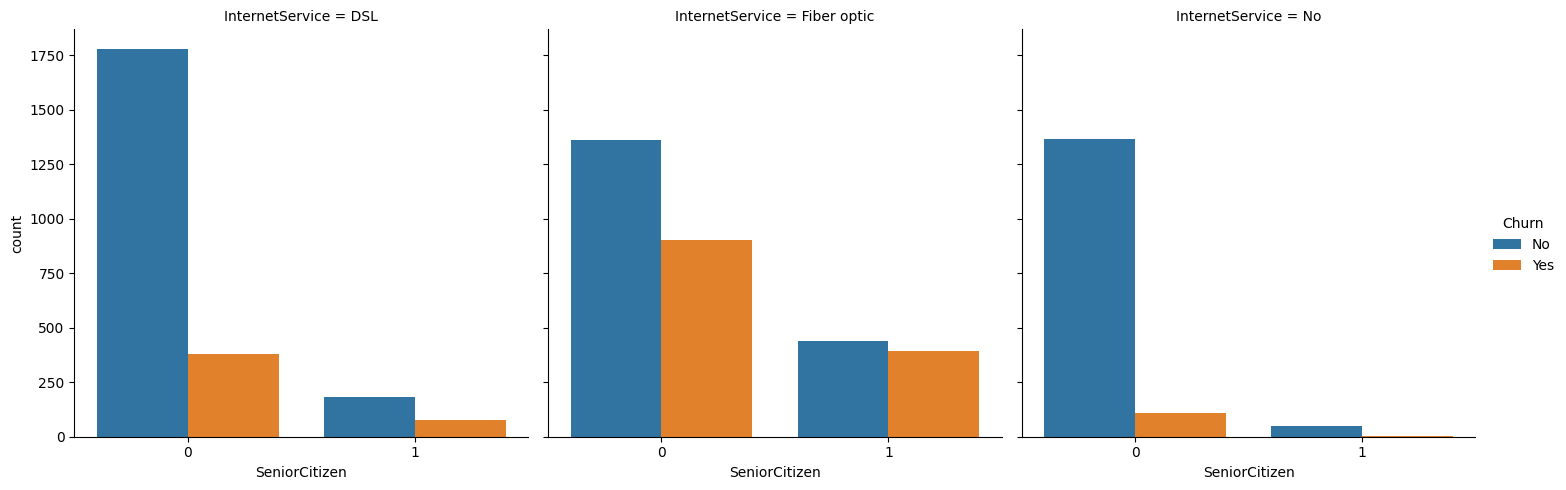

In [29]:
sns.catplot(data=df, x="SeniorCitizen", hue="Churn", col="InternetService", kind="count")
# so from here we can get a insight that the 

<Axes: xlabel='Churn', ylabel='InternetService'>

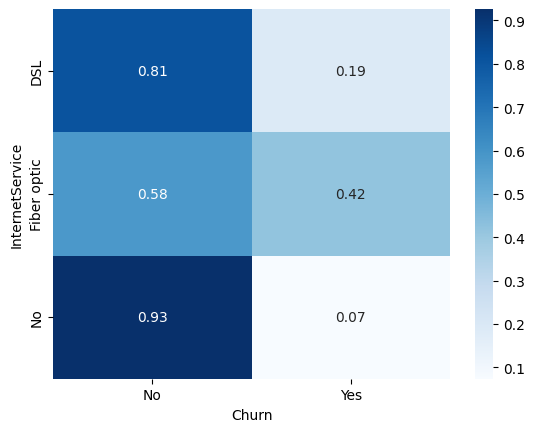

In [30]:
pivot = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")


<Axes: xlabel='Contract', ylabel='MonthlyCharges'>

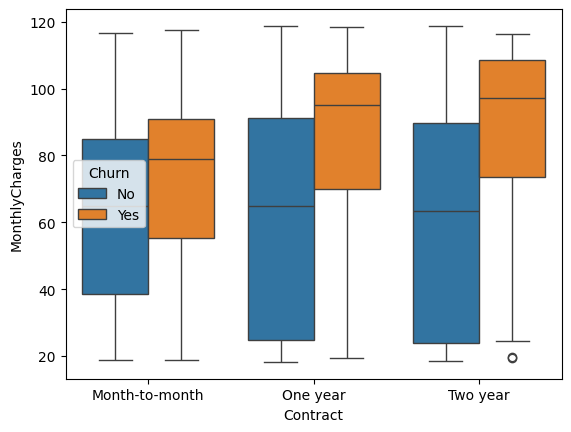

In [31]:
sns.boxplot(data=df, x="Contract", y="MonthlyCharges", hue="Churn")

<Axes: xlabel='tenure', ylabel='ChurnNum'>

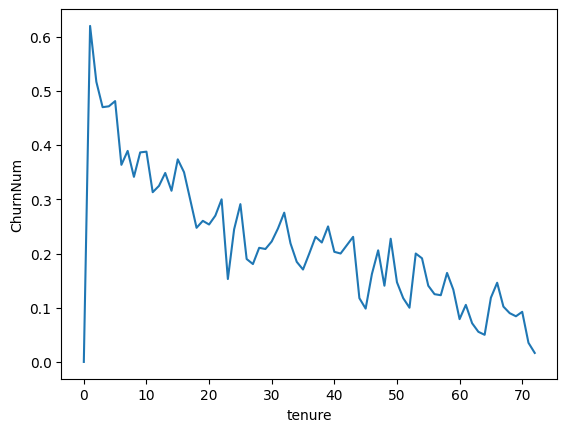

In [32]:
df['ChurnNum'] = df['Churn'].map({'Yes':1,'No':0})
churn_by_tenure = df.groupby('tenure')['ChurnNum'].mean().reset_index()
sns.lineplot(data=churn_by_tenure, x="tenure", y="ChurnNum")


<Axes: xlabel='Contract', ylabel='tenure'>

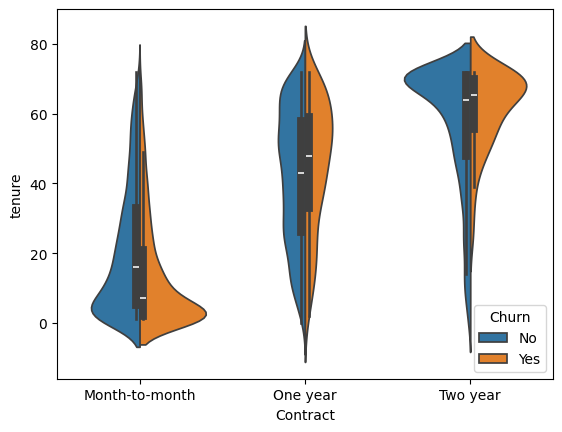

In [33]:
sns.violinplot(data=df, x="Contract", y="tenure", hue="Churn", split=True)


In [34]:
import plotly.express as px
fig = px.treemap(df, path=["Contract","PaymentMethod","Churn"], values="MonthlyCharges")
fig.show()


C:\Users\91800\Desktop\vs codeee\venv\lib\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




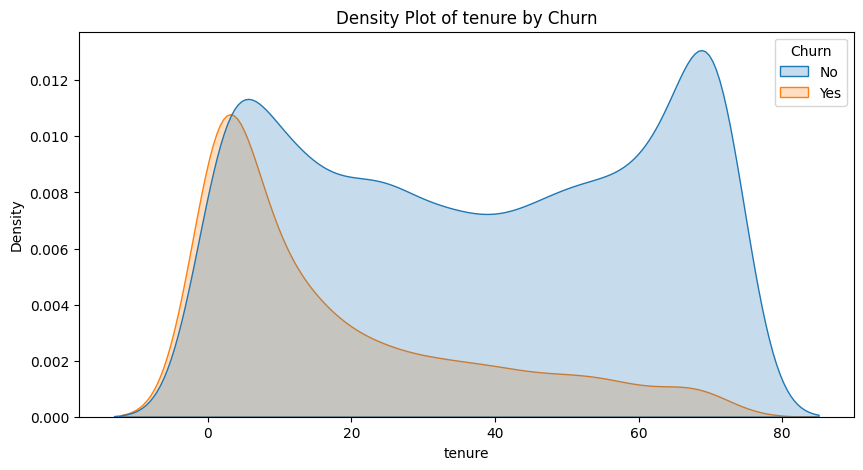

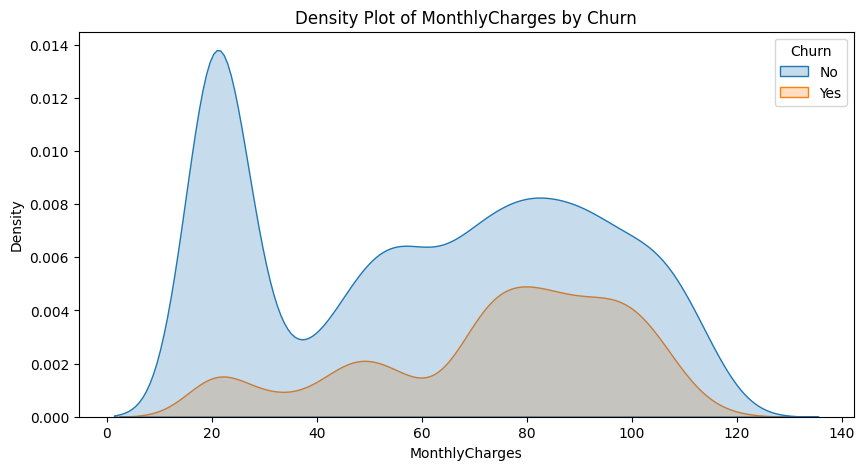

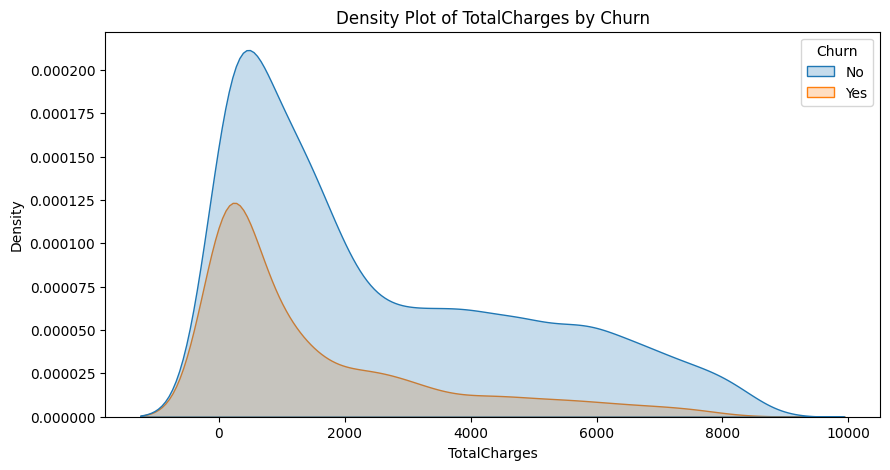

In [35]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True)
    plt.title(f"Density Plot of {col} by Churn")
    plt.show()


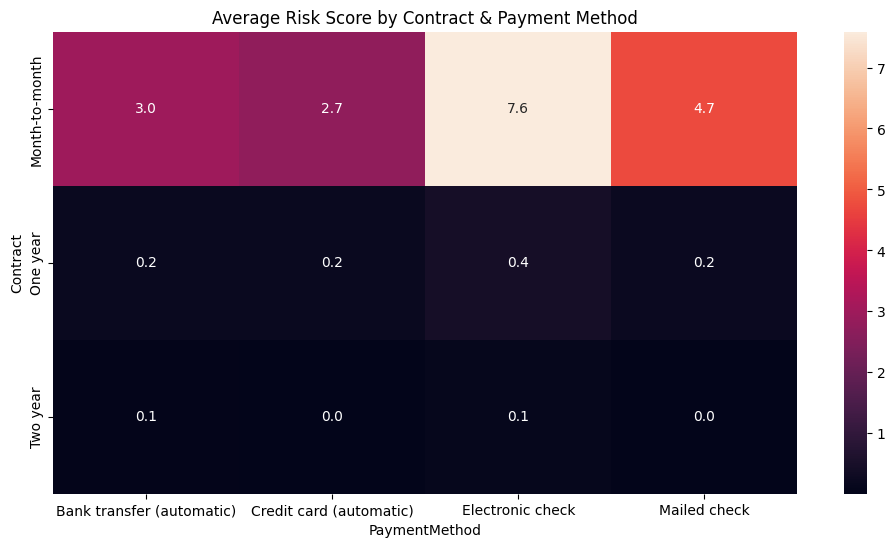

In [36]:
df['RiskScore'] = df['MonthlyCharges'] * (df['ChurnNum']) / (df['tenure']+1)
plt.figure(figsize=(12,6))
sns.heatmap(df.pivot_table(index='Contract', columns='PaymentMethod', values='RiskScore', aggfunc='mean'), annot=True, fmt=".1f")
plt.title("Average Risk Score by Contract & Payment Method")
plt.show()


In [37]:
import plotly.express as px
fig = px.sunburst(df, path=['Contract', 'InternetService', 'PaymentMethod', 'Churn'], values='MonthlyCharges')
fig.show()


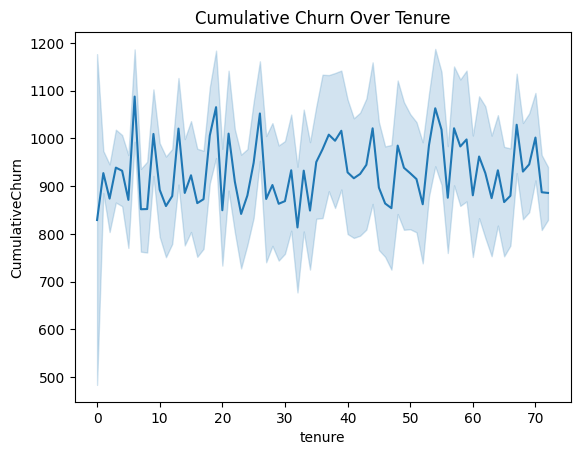

In [38]:
df['CumulativeChurn'] = df['ChurnNum'].cumsum()
sns.lineplot(data=df, x='tenure', y='CumulativeChurn',)
plt.title("Cumulative Churn Over Tenure")
plt.show()


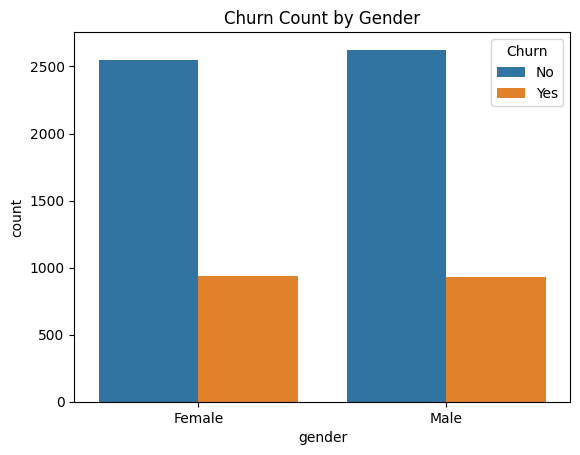

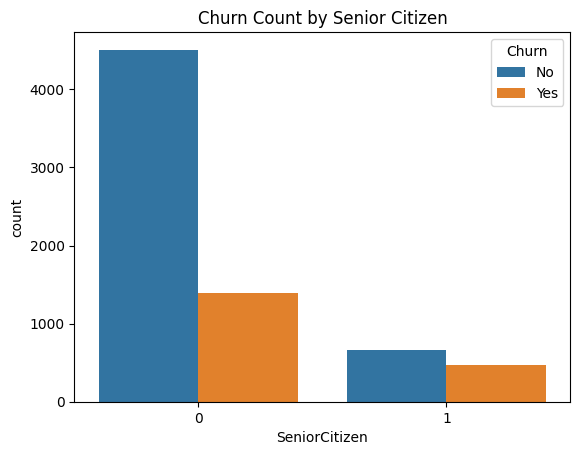

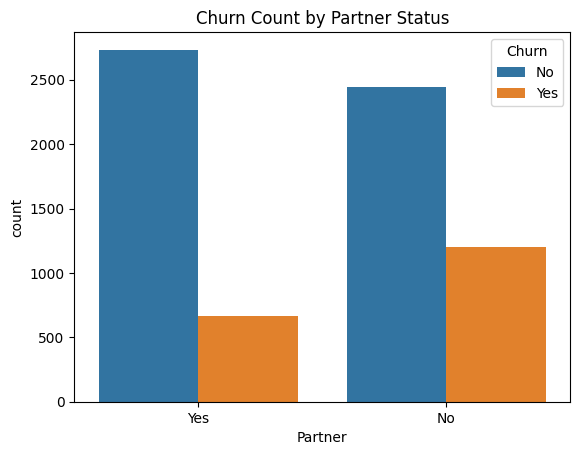

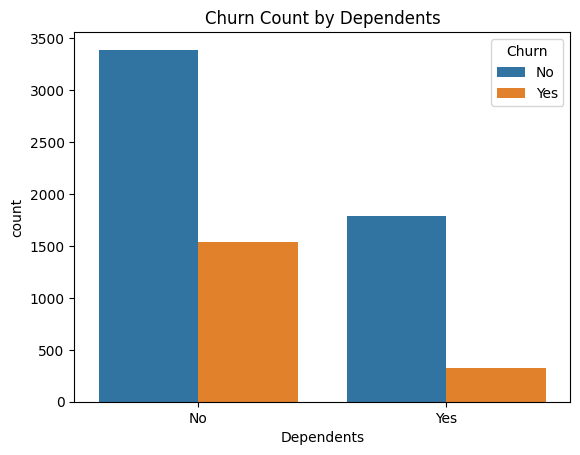

In [39]:
# Gender vs Churn
sns.countplot(data=df, x='gender', hue='Churn')
plt.title("Churn Count by Gender")
plt.show()

# Senior Citizen vs Churn
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title("Churn Count by Senior Citizen")
plt.show()

# Partner/Dependents vs Churn
sns.countplot(data=df, x='Partner', hue='Churn')
plt.title("Churn Count by Partner Status")
plt.show()
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title("Churn Count by Dependents")
plt.show()


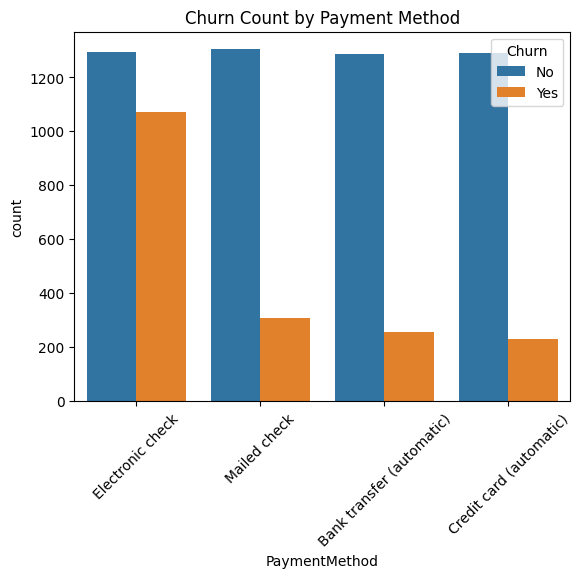

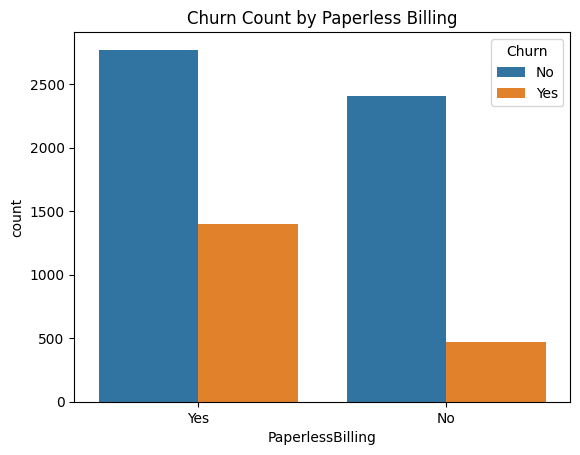

In [40]:
# Payment Method vs Churn
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn Count by Payment Method")
plt.xticks(rotation=45)
plt.show()

# Paperless billing vs Churn
sns.countplot(data=df, x='PaperlessBilling', hue='Churn')
plt.title("Churn Count by Paperless Billing")
plt.show()


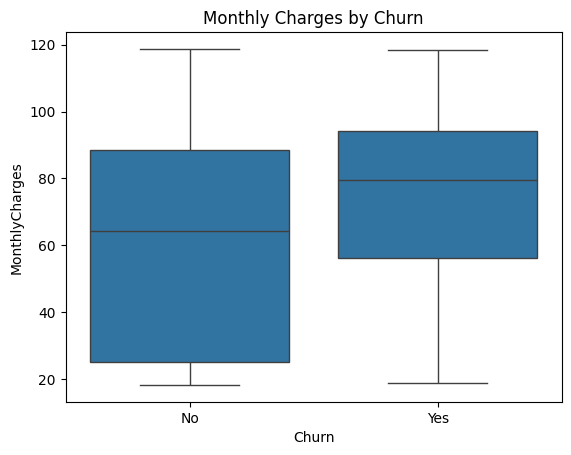

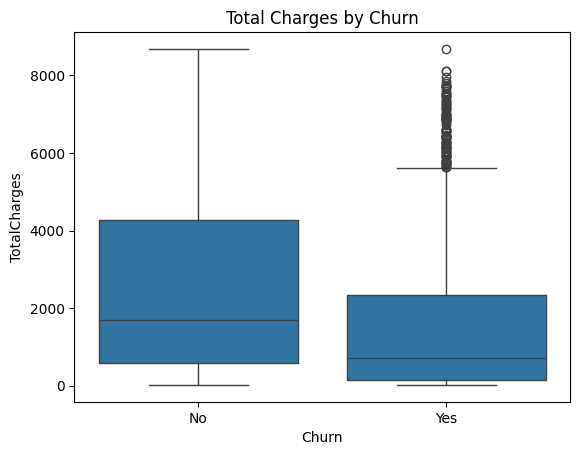

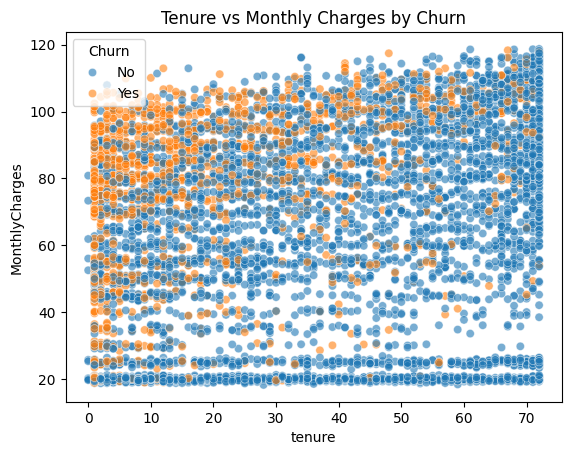

In [41]:
# Monthly Charges
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn")
plt.show()

# Total Charges
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title("Total Charges by Churn")
plt.show()

# Scatter Tenure vs MonthlyCharges
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title("Tenure vs Monthly Charges by Churn")
plt.show()


#High monthly charges may correlate with churn.

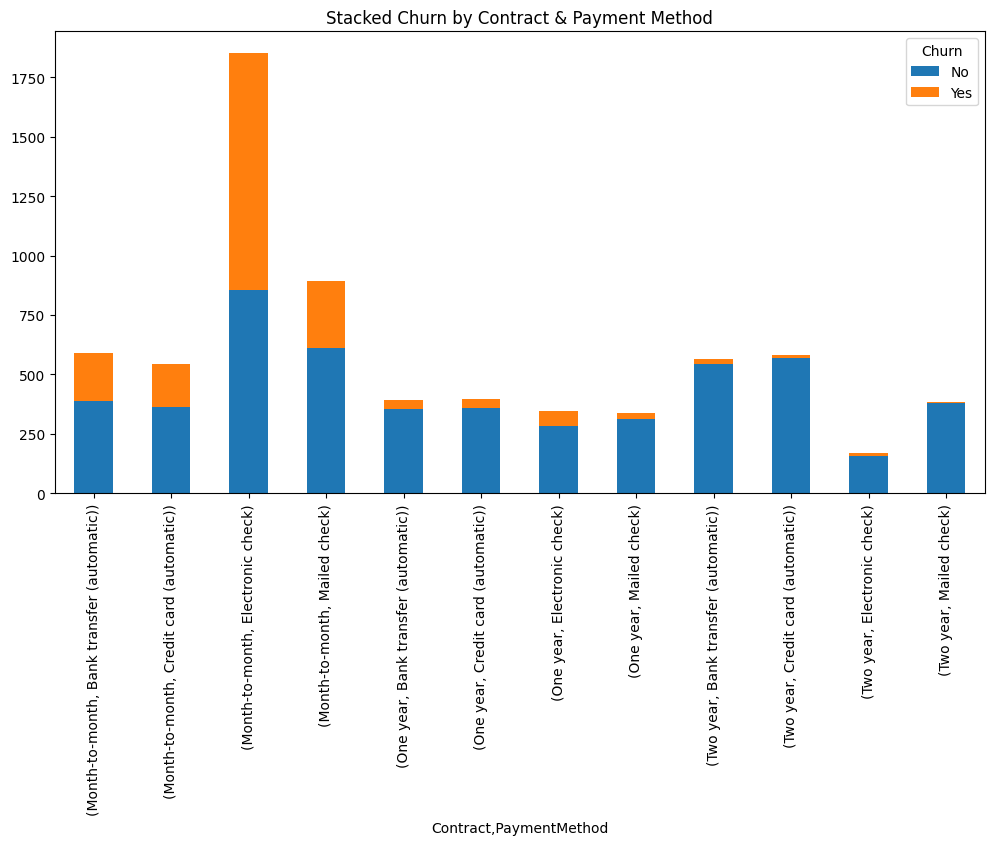

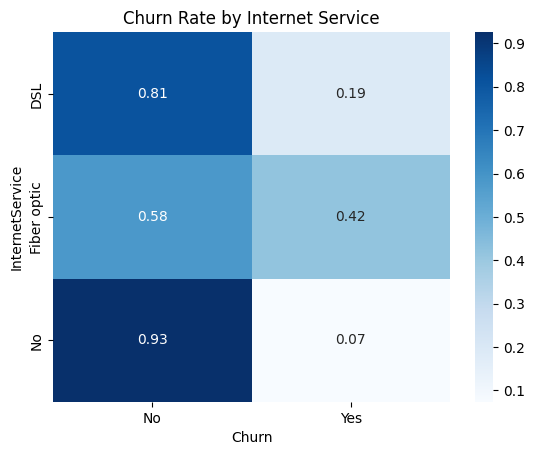

In [42]:
# Contract & Payment Method stacked bar
pd.crosstab([df.Contract, df.PaymentMethod], df.Churn).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Stacked Churn by Contract & Payment Method")
plt.show()

# Internet Service vs Security
pivot = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Churn Rate by Internet Service")
plt.show()


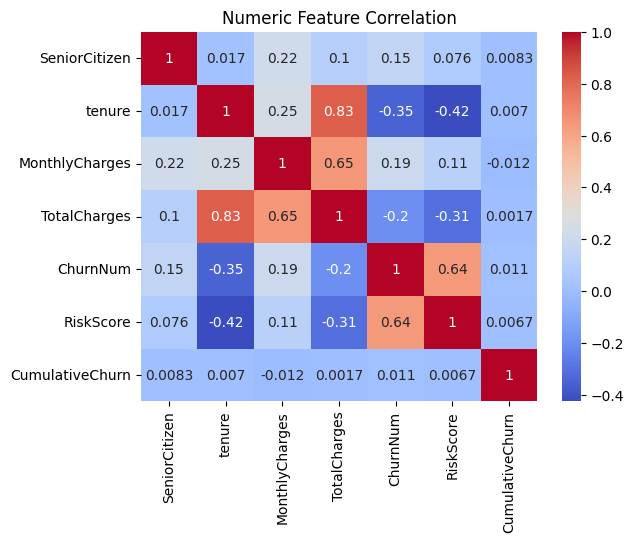

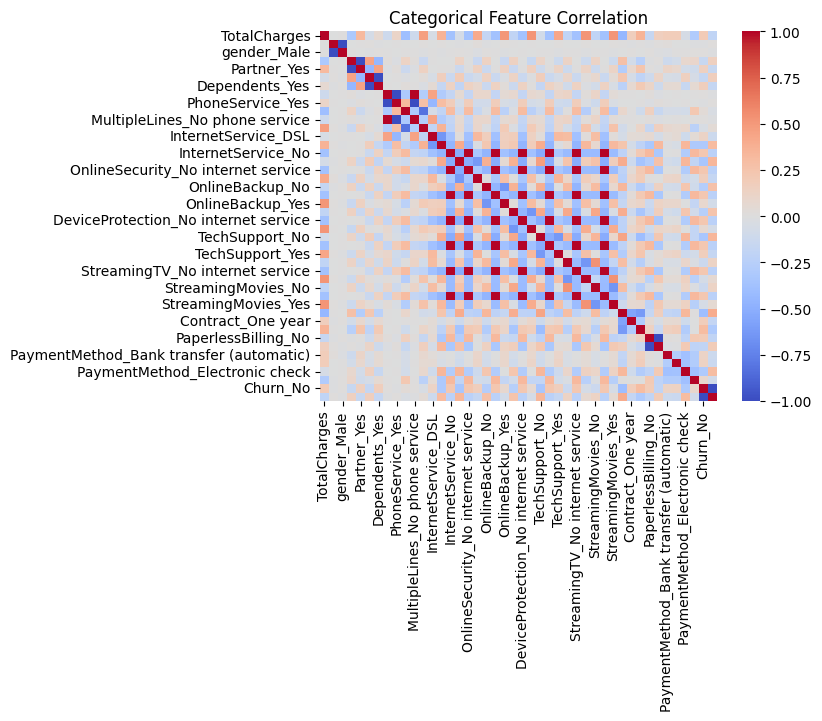

In [43]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation")
plt.show()


sns.heatmap(pd.get_dummies(df[cat_cols]).corr(), cmap="coolwarm")
plt.title("Categorical Feature Correlation")
plt.show()


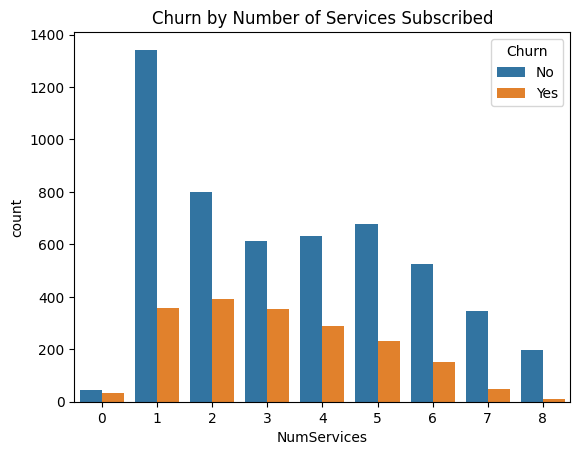

In [44]:
df['NumServices'] = df[['PhoneService','MultipleLines','InternetService',
                        'OnlineSecurity','OnlineBackup','DeviceProtection',
                        'TechSupport','StreamingTV','StreamingMovies']].apply(lambda x: sum(x=='Yes'), axis=1)

sns.countplot(data=df, x='NumServices', hue='Churn')
plt.title("Churn by Number of Services Subscribed")
plt.show()
#See if using more services reduces churn.

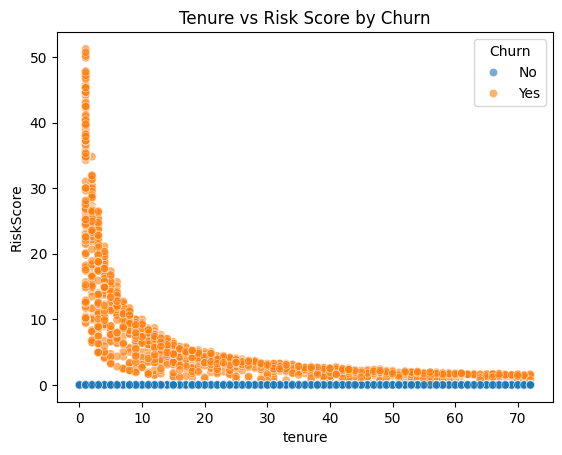

In [45]:
sns.scatterplot(data=df, x='tenure', y='RiskScore', hue='Churn', alpha=0.6)
plt.title("Tenure vs Risk Score by Churn")
plt.show()


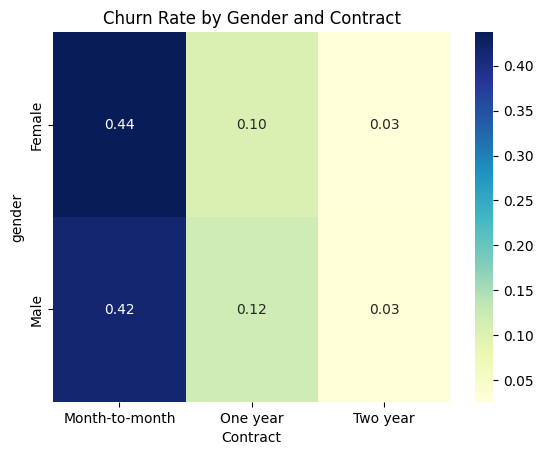

In [46]:
pivot = pd.crosstab(df['gender'], df['Contract'], values=df['ChurnNum'], aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Churn Rate by Gender and Contract")
plt.show()


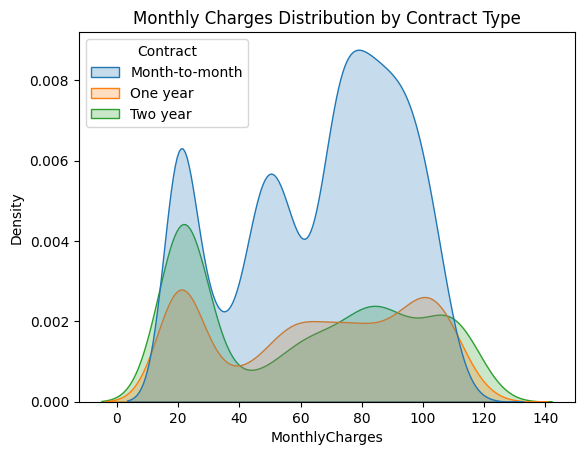

In [47]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Contract', fill=True)
plt.title("Monthly Charges Distribution by Contract Type")
plt.show()


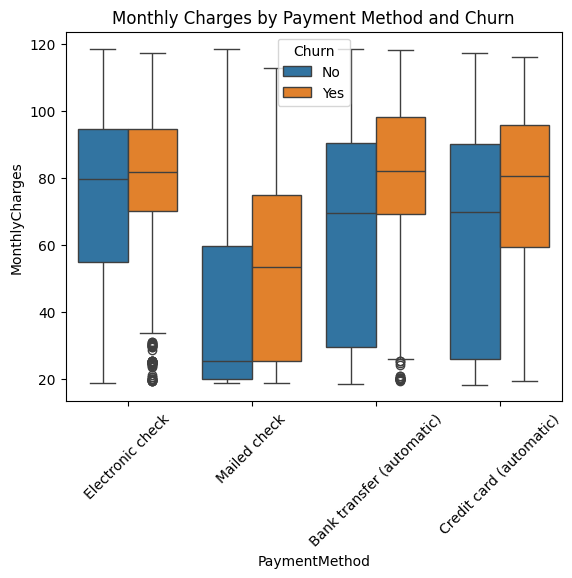

In [48]:
sns.boxplot(data=df, x='PaymentMethod', y='MonthlyCharges', hue='Churn')
plt.xticks(rotation=45)
plt.title("Monthly Charges by Payment Method and Churn")
plt.show()


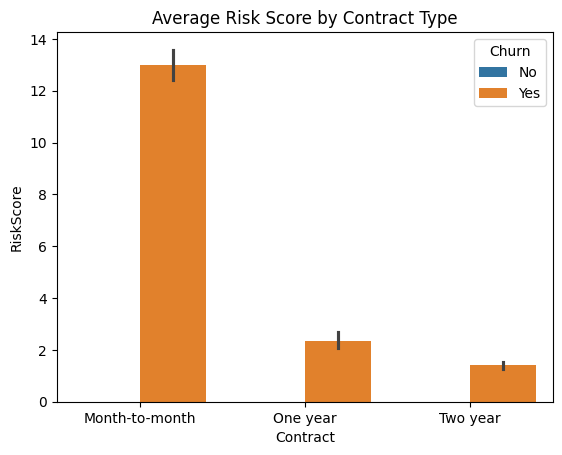

In [49]:
sns.barplot(data=df, x='Contract', y='RiskScore', hue='Churn')
plt.title("Average Risk Score by Contract Type")
plt.show()


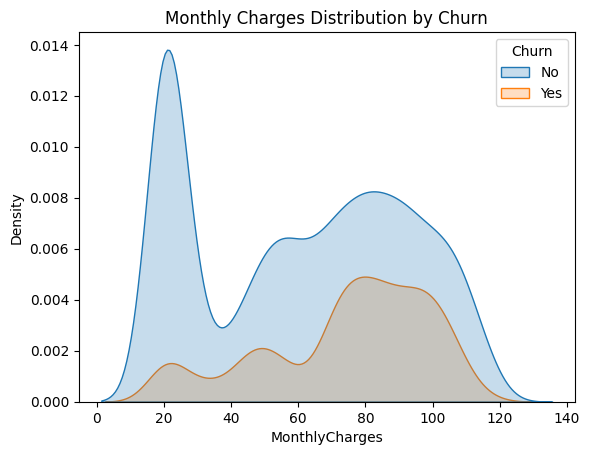

In [50]:
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


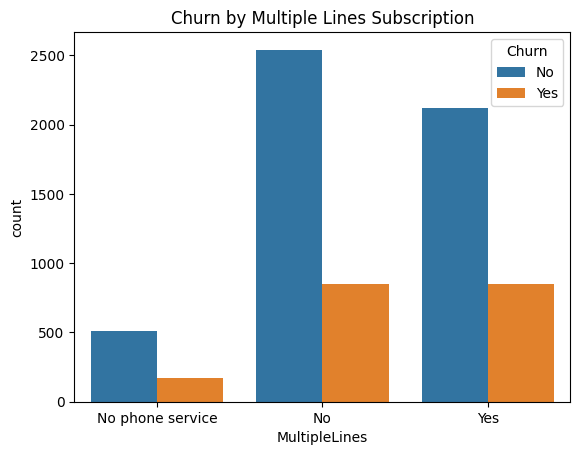

In [51]:
sns.countplot(data=df, x='MultipleLines', hue='Churn')
plt.title("Churn by Multiple Lines Subscription")
plt.show()


# Now we are going to fix the data and problem that we have face and first we are goingt to fix the null values in the data

In [52]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group        11
ChurnNum             0
RiskScore            0
CumulativeChurn      0
NumServices          0
dtype: int64

In [53]:
df['tenure_group']=df['tenure_group'].fillna(df['tenure_group'].mode())

In [54]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group        11
ChurnNum             0
RiskScore            0
CumulativeChurn      0
NumServices          0
dtype: int64

In [55]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

# We are now going to detect the skewness in the code

In [56]:
# Select first  numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness
skewness = df[num_cols].skew().sort_values(ascending=False)
print("Skewness of numeric columns:\n", skewness)


Skewness of numeric columns:
 RiskScore          3.308858
SeniorCitizen      1.833633
ChurnNum           1.063031
TotalCharges       0.962394
NumServices        0.450807
tenure             0.239540
CumulativeChurn    0.013054
MonthlyCharges    -0.220524
dtype: float64


In [57]:
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn tenure_group  ChurnNum  RiskScore  CumulativeChurn  \
0            29.85    No         0-12         0   0.000000                0   
1          1889.50    No        25-36         0   0.000000                0   
2           108.15   Yes         0-12         1  17.950000                1   
3          1840.75    No        37-48         0   0.000000                1   
4           151.65   Yes         0-12         1  23.566667                2   
...            ...   ...          ...       ... 

In [58]:
df_cat=df.select_dtypes(include=object)


In [59]:
#the reason was i have already converted into num column and col is Churn num
df_cat.drop(['Churn'],axis=1,inplace=True)

In [60]:
df_num=df.select_dtypes('int64','float64')

In [61]:
df_num

SeniorCitizen  tenure  ChurnNum  CumulativeChurn  NumServices
0                 0       1         0                0            1
1                 0      34         0                0            3
2                 0       2         1                1            3
3                 0      45         0                1            3
4                 0       2         1                2            1
...             ...     ...       ...              ...          ...
7038              0      24         0             1868            7
7039              0      72         0             1868            6
7040              0      11         0             1868            1
7041              1       4         1             1869            2
7042              0      66         0             1869            6

[7043 rows x 5 columns]

In [62]:
df_num.describe()

SeniorCitizen       tenure     ChurnNum  CumulativeChurn  NumServices
count    7043.000000  7043.000000  7043.000000      7043.000000  7043.000000
mean        0.162147    32.371149     0.265370       925.399120     3.362914
std         0.368612    24.559481     0.441561       538.434859     2.062031
min         0.000000     0.000000     0.000000         0.000000     0.000000
25%         0.000000     9.000000     0.000000       460.000000     1.000000
50%         0.000000    29.000000     0.000000       917.000000     3.000000
75%         0.000000    55.000000     1.000000      1382.500000     5.000000
max         1.000000    72.000000     1.000000      1869.000000     8.000000

In [63]:
# so here we can see that data is neeed to be scaled perflect but we are going to scale three coulms onluy which is tenure,CumilativeChurn,and numsercies

df_Scale=df[['CumulativeChurn','NumServices','tenure']]

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc=StandardScaler()

In [66]:
scaled_data=pd.DataFrame(sc.fit_transform(df_Scale),columns=df_Scale.columns)

In [67]:
df_num.drop(['CumulativeChurn','NumServices','tenure'],axis=1,inplace=True)

In [68]:
df_num=pd.concat([df_num,scaled_data],axis=1)

In [69]:
df_cat=pd.concat([df_cat,df['tenure_group']],axis=1)

In [70]:
for col in df_cat: 
    print(f"the unique value in the column {col} is :",df_cat[col].unique())

the unique value in the column gender is : ['Female' 'Male']
the unique value in the column Partner is : ['Yes' 'No']
the unique value in the column Dependents is : ['No' 'Yes']
the unique value in the column PhoneService is : ['No' 'Yes']
the unique value in the column MultipleLines is : ['No phone service' 'No' 'Yes']
the unique value in the column InternetService is : ['DSL' 'Fiber optic' 'No']
the unique value in the column OnlineSecurity is : ['No' 'Yes' 'No internet service']
the unique value in the column OnlineBackup is : ['Yes' 'No' 'No internet service']
the unique value in the column DeviceProtection is : ['No' 'Yes' 'No internet service']
the unique value in the column TechSupport is : ['No' 'Yes' 'No internet service']
the unique value in the column StreamingTV is : ['No' 'Yes' 'No internet service']
the unique value in the column StreamingMovies is : ['No' 'Yes' 'No internet service']
the unique value in the column Contract is : ['Month-to-month' 'One year' 'Two year']
th

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
ohe=OneHotEncoder(drop='first',dtype=int,sparse_output=False)

In [88]:
df_cat=pd.DataFrame(ohe.fit_transform(df_cat),columns=ohe.get_feature_names_out(df_cat.columns))

In [96]:
new_df=pd.concat([df_cat,df_num],axis=1)

In [102]:
new_df.drop(['CumulativeChurn'],axis=1,inplace=True)

In [106]:
df['TotalCharges']=sc.fit_transform(df[['TotalCharges']])

In [110]:
final_df=pd.concat((new_df,df['TotalCharges']),axis=1)

# Now training the model for the Customer Churn or not and Churn at Y axis

In [114]:
X=final_df.drop(['ChurnNum'],axis=1)
Y=final_df['ChurnNum']

In [115]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC (linear)": SVC(kernel="linear", probability=True),
    "SVC (rbf)": SVC(kernel="rbf", probability=True),
    "Bagging": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False)
}

results = []


In [119]:

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(Y_test, y_pred),
        "Precision": precision_score(Y_test, y_pred, zero_division=0),
        "Recall": recall_score(Y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(Y_test, y_pred, zero_division=0),
        "ROC AUC": roc_auc_score(Y_test, y_proba) if y_proba is not None else None
    }
    results.append(metrics)

df_results = pd.DataFrame(results)
print(df_results)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.803407   0.664407  0.524064  0.585949  0.843042
1        Decision Tree  0.721079   0.474801  0.478610  0.476698  0.643149
2        Random Forest  0.782825   0.618056  0.475936  0.537764  0.818829
3                  KNN  0.753016   0.535714  0.521390  0.528455  0.782709
4         SVC (linear)  0.788502   0.638686  0.467914  0.540123  0.819373
5            SVC (rbf)  0.797019   0.664179  0.475936  0.554517  0.797187
6              Bagging  0.773598   0.601476  0.435829  0.505426  0.792690
7             AdaBoost  0.799148   0.646302  0.537433  0.586861  0.846221
8    Gradient Boosting  0.799148   0.649180  0.529412  0.583211  0.844328
9              XGBoost  0.789922   0.621875  0.532086  0.573487  0.827424


In [120]:
best_model = df_results.sort_values(by="F1 Score", ascending=False).iloc[0]
print("\nBest Model:", best_model["Model"])
print(best_model)


Best Model: AdaBoost
Model        AdaBoost
Accuracy     0.799148
Precision    0.646302
Recall       0.537433
F1 Score     0.586861
ROC AUC      0.846221
Name: 7, dtype: object


In [123]:
best_model2 = df_results.sort_values(by="Accuracy", ascending=False).iloc[0]
print("\nBest Model:", best_model2["Model"])
print(best_model2)


Best Model: Logistic Regression
Model        Logistic Regression
Accuracy                0.803407
Precision               0.664407
Recall                  0.524064
F1 Score                0.585949
ROC AUC                 0.843042
Name: 0, dtype: object


In [126]:
best_model3 = df_results.sort_values(by="Precision", ascending=False).iloc[0]
print("\nBest Model:", best_model3["Model"])
print(best_model3)


Best Model: Logistic Regression
Model        Logistic Regression
Accuracy                0.803407
Precision               0.664407
Recall                  0.524064
F1 Score                0.585949
ROC AUC                 0.843042
Name: 0, dtype: object


In [127]:
best_model4 = df_results.sort_values(by="ROC AUC", ascending=False).iloc[0]
print("\nBest Model:", best_model4["Model"])
print(best_model4)


Best Model: AdaBoost
Model        AdaBoost
Accuracy     0.799148
Precision    0.646302
Recall       0.537433
F1 Score     0.586861
ROC AUC      0.846221
Name: 7, dtype: object


In [128]:
best_model5 = df_results.sort_values(by="Recall", ascending=False).iloc[0]
print("\nBest Model:", best_model5["Model"])
print(best_model5)


Best Model: AdaBoost
Model        AdaBoost
Accuracy     0.799148
Precision    0.646302
Recall       0.537433
F1 Score     0.586861
ROC AUC      0.846221
Name: 7, dtype: object


# Final Summary of the code 

In [129]:
# Identify best models per metric
best_accuracy = df_results.loc[df_results['Accuracy'].idxmax()]
best_precision = df_results.loc[df_results['Precision'].idxmax()]
best_recall = df_results.loc[df_results['Recall'].idxmax()]
best_f1 = df_results.loc[df_results['F1 Score'].idxmax()]
best_roc_auc = df_results.loc[df_results['ROC AUC'].idxmax()]

print("===== Model Performance Summary =====\n")

print(f"Highest Accuracy      : {best_accuracy['Model']} ({best_accuracy['Accuracy']:.3f})")
print(f"Highest Precision     : {best_precision['Model']} ({best_precision['Precision']:.3f})")
print(f"Highest Recall        : {best_recall['Model']} ({best_recall['Recall']:.3f})")
print(f"Highest F1 Score      : {best_f1['Model']} ({best_f1['F1 Score']:.3f})")
print(f"Highest ROC-AUC       : {best_roc_auc['Model']} ({best_roc_auc['ROC AUC']:.3f})\n")

print("===== Overall Recommendation =====\n")

# Balanced view: choose model near top across recall, F1, ROC-AUC
print("AdaBoost is the most balanced model across Recall, F1 Score, and ROC-AUC.")
print("Logistic Regression is slightly better for Accuracy and Precision.")
print("Decision Trees, KNN, and SVC variants perform moderately, while Bagging and XGBoost are close but slightly behind.\n")

print("Choose your final model based on business priority:")
print("- If catching positives is most important → AdaBoost")
print("- If avoiding false positives or overall accuracy is key → Logistic Regression")


===== Model Performance Summary =====

Highest Accuracy      : Logistic Regression (0.803)
Highest Precision     : Logistic Regression (0.664)
Highest Recall        : AdaBoost (0.537)
Highest F1 Score      : AdaBoost (0.587)
Highest ROC-AUC       : AdaBoost (0.846)

===== Overall Recommendation =====

AdaBoost is the most balanced model across Recall, F1 Score, and ROC-AUC.
Logistic Regression is slightly better for Accuracy and Precision.
Decision Trees, KNN, and SVC variants perform moderately, while Bagging and XGBoost are close but slightly behind.

Choose your final model based on business priority:
- If catching positives is most important → AdaBoost
- If avoiding false positives or overall accuracy is key → Logistic Regression


# Overall Recommendation for Binary Churn Prediction:

# - Best Model: AdaBoostClassifier
# - Why: Highest Recall, F1 Score, and ROC-AUC among tested models, making it most effective for identifying churners.
# - Note: Logistic Regression has slightly higher Accuracy and Precision, useful if avoiding false positives is critical.


In [131]:
random_index = X_test.sample(1, random_state=42).index[0]
single_X = X_test.loc[[random_index]]  # keep it as DataFrame, not Series
single_Y = Y_test.loc[random_index]

print("Selected row features:\n", single_X)
print("Actual label:", single_Y)

Selected row features:
       gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
5902            0            1               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  \
5902                               0                  0   

      InternetService_Fiber optic  InternetService_No  \
5902                            0                   0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
5902                                   0                   0   

      OnlineBackup_No internet service  OnlineBackup_Yes  \
5902                                 0                 1   

      DeviceProtection_No internet service  DeviceProtection_Yes  \
5902                                     0                     0   

      TechSupport_No internet service  TechSupport_Yes  \
5902                                0                0   

      StreamingTV_No internet service  StreamingTV_Yes  \
5902                                0      

In [137]:
best_model_name = "AdaBoost"  # or whichever model you like
model = models[best_model_name]

# Predict
pred = model.predict(single_X)
pred_proba = model.predict_proba(single_X)[:, 1] if hasattr(model, "predict_proba") else None

print("Predicted Churn:", pred[0])
print("Probability of Churn:", pred_proba[0] if pred_proba is not None else "N/A")

Predicted Churn: 0
Probability of Churn: 0.49272443734572147


In [139]:
best_model_name = "Logistic Regression"  
model = models[best_model_name]

# Predict
pred = model.predict(single_X)
pred_proba = model.predict_proba(single_X)[:, 1] if hasattr(model, "predict_proba") else None

print("Predicted Churn:", pred[0])
print("Probability of Churn:", pred_proba[0] if pred_proba is not None else "N/A")

Predicted Churn: 0
Probability of Churn: 0.24258685914982647


In [140]:
best_model_name = "Random Forest"  
model = models[best_model_name]

# Predict
pred = model.predict(single_X)
pred_proba = model.predict_proba(single_X)[:, 1] if hasattr(model, "predict_proba") else None

print("Predicted Churn:", pred[0])
print("Probability of Churn:", pred_proba[0] if pred_proba is not None else "N/A")

Predicted Churn: 0
Probability of Churn: 0.15


In [143]:
final_df.head(2)

gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            0            1               0                 0   
1            1            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                   0                   0   
1                                   0                   1   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                 0                 1   
1                                 0                 0   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                     0                     0   
1                                     0                     1   

   TechSupport_No internet service  TechSupport_Yes  \
0                                0                0   
1                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   

   PaymentMethod_Mailed check  tenure_group_13-24  tenure_group_25-36  \
0                           0                   0                   0   
1                           1                   0                   1   

   tenure_group_37-48  tenure_group_49-60  tenure_group_61-72  \
0                   0                   0                   0   
1                   0                   0                   0   

   tenure_group_nan  SeniorCitizen  ChurnNum  NumServices    tenure  \
0                 0              0         0    -1.145997 -1.277445   
1                 0              0         0    -0.176011  0.066327   

   TotalCharges  
0     -0.994971  
1     -0.173876

# Now for the total charges 

In [146]:
X_reg=final_df.drop(['TotalCharges'],axis=1)
Y_reg=final_df['TotalCharges']

In [147]:
X_train_reg,X_test_reg,Y_train_reg,Y_test_reg=train_test_split(X_reg,Y_reg,test_size=0.2,random_state=42)

In [148]:
# Define regression models
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Voting Regressor": VotingRegressor([('lr', LinearRegression()), ('rf', RandomForestRegressor())]),
    "Stacking Regressor": StackingRegressor([('lr', LinearRegression()), ('rf', RandomForestRegressor())]),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost Regressor": XGBRegressor(eval_metric='rmse')
}

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results_reg = []

for name, model in regressors.items():
    model.fit(X_train_reg, Y_train_reg)
    y_pred = model.predict(X_test_reg)
    
    metrics = {
        "Model": name,
        "RMSE": mean_squared_error(Y_test_reg, y_pred, squared=False),
        "MAE": mean_absolute_error(Y_test_reg, y_pred),
        "R2 Score": r2_score(Y_test_reg, y_pred)
    }
    
    results_reg.append(metrics)

df_results_reg = pd.DataFrame(results_reg)
print(df_results_reg)

best_reg_model = df_results_reg.sort_values(by="R2 Score", ascending=False).iloc[0]
print("\nBest Regression Model:", best_reg_model["Model"])
print(best_reg_model)


                 Model      RMSE       MAE  R2 Score
0    Linear Regression  0.304914  0.242970  0.908267
1     Ridge Regression  0.304096  0.242832  0.908759
2     Lasso Regression  1.006883  0.847293 -0.000295
3        Decision Tree  0.067099  0.042826  0.995558
4        Random Forest  0.048391  0.031471  0.997690
5    Gradient Boosting  0.061305  0.043021  0.996292
6    Bagging Regressor  0.052087  0.033755  0.997323
7     Voting Regressor  0.157751  0.125673  0.975446
8   Stacking Regressor  0.048876  0.032148  0.997643
9        KNN Regressor  0.153465  0.105470  0.976762
10                 SVR  0.060787  0.047912  0.996354
11   XGBoost Regressor  0.045311  0.029092  0.997974

Best Regression Model: XGBoost Regressor
Model       XGBoost Regressor
RMSE                 0.045311
MAE                  0.029092
R2 Score             0.997974
Name: 11, dtype: object


In [149]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np
import pandas as pd

models_reg = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Voting Regressor": VotingRegressor(estimators=[
        ('lr', LinearRegression()), ('rf', RandomForestRegressor()), ('gb', GradientBoostingRegressor())
    ]),
    "Stacking Regressor": StackingRegressor(estimators=[
        ('lr', LinearRegression()), ('rf', RandomForestRegressor()), ('gb', GradientBoostingRegressor())
    ]),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost Regressor": XGBRegressor(eval_metric="rmse")
}

cv_results = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)  

for name, model in models_reg.items():

    neg_mse_scores = cross_val_score(model, X_train_reg, Y_train_reg, scoring='neg_mean_squared_error', cv=kf)
    r2_scores = cross_val_score(model, X_train_reg, Y_train_reg, scoring='r2', cv=kf)
    
    rmse_scores = np.sqrt(-neg_mse_scores)
    
    cv_results.append({
        "Model": name,
        "CV RMSE Mean": rmse_scores.mean(),
        "CV RMSE Std": rmse_scores.std(),
        "CV R2 Mean": r2_scores.mean(),
        "CV R2 Std": r2_scores.std()
    })

df_cv_results = pd.DataFrame(cv_results).sort_values(by="CV R2 Mean", ascending=False)
print(df_cv_results)


                 Model  CV RMSE Mean  CV RMSE Std  CV R2 Mean  CV R2 Std
11   XGBoost Regressor      0.046369     0.000968    0.997840   0.000108
8   Stacking Regressor      0.049325     0.002875    0.997562   0.000266
4        Random Forest      0.052118     0.002308    0.997266   0.000248
6    Bagging Regressor      0.055568     0.002567    0.996957   0.000224
10                 SVR      0.061766     0.001314    0.996168   0.000177
5    Gradient Boosting      0.062388     0.002798    0.996084   0.000353
3        Decision Tree      0.073664     0.002207    0.994634   0.000244
7     Voting Regressor      0.108300     0.001840    0.988216   0.000401
9        KNN Regressor      0.157516     0.004342    0.975079   0.001260
1     Ridge Regression      0.295203     0.005269    0.912501   0.002710
0    Linear Regression      0.295481     0.004927    0.912336   0.002600
2     Lasso Regression      0.998345     0.007563   -0.000525   0.000564


# Final Recommendation based on 5-Fold Cross Validation
# ===============================================

# Best model based on CV:
# XGBoost Regressor
# Reason: Lowest CV RMSE (0.046), highest CV R² (0.998), very stable across folds.

# Other top-performing models:
# 1. Stacking Regressor (CV R² ≈ 0.998, CV RMSE ≈ 0.049)
# 2. Random Forest Regressor (CV R² ≈ 0.997, CV RMSE ≈ 0.052)
# 3. Bagging Regressor (CV R² ≈ 0.997, CV RMSE ≈ 0.056)

# Notes:
# - Linear models (Linear, Ridge, Lasso) underperformed with R² ≈ 0.91.
# - KNN, Voting Regressor, and SVR performed moderately but worse than XGB.
# - Tiny CV std indicates models are consistent across folds → low variance.
# - XGB's performance is excellent but check on test set for overfitting.


In [153]:
# Train best model on full training set
best_model = XGBRegressor(eval_metric="rmse")
best_model.fit(X_train_reg, Y_train_reg)

# Predict on test set
Y_pred_test = best_model.predict(X_test_reg)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
rmse_test = mean_squared_error(Y_test_reg, Y_pred_test, squared=False)
r2_test = r2_score(Y_test_reg, Y_pred_test)

print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")


Test RMSE: 0.0453
Test R²: 0.9980
